In [1]:
# Modulos necesarios 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as datetime 
import zipfile, requests, io
import datetime
from docx import Document
from docx.shared import Inches
import os 
import warnings
from docx.enum.text import WD_ALIGN_PARAGRAPH
import numpy as np 

warnings.filterwarnings('ignore')

string = datetime.datetime.today().strftime('%y%m%d') #Para descargar la base despues de las 7 pm
#string = '210105' # RECUERDA PONER EL OTRO PARA ACTUALIZAR, antes de las 7 pm
path = 'C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/generales/' #nombres de estados, poblacion y tablas de semana anterior
path2 = 'C:/Users/Emilio EG/Documents/ITAM/CIC19/Reportes/'+string+'/' #Aquí se va a guardar lo nuevo
path3 = 'C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/mapa/' #bases de los mapas (shp)
#path4 = 'C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/internacional/'
path4 = path2
os.mkdir(path2) # Este comando crea el folder en el desktop con la fecha del día 

#CAMBIA ESTA SECCION PARA GASTAR MENOS MEMORIA. SOLO DESCARGA EL ZIP Y DESPUES ABRE SIN EXTRAER
zp = requests.get('http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip')
zf = zipfile.ZipFile(io.BytesIO(zp.content)) 
zf.extractall(path2)

base_covid = pd.read_csv(path2+string+'COVID19MEXICO'+'.csv',encoding='latin1',low_memory=True) 
print(len(base_covid))
base_covid.head()


4902400


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-02-08,z482b8,1,12,9,2,9,9,12,1,...,2,2,97,2,97,1,99,MÃ©xico,97,97
1,2021-02-08,z49a69,1,12,23,1,23,23,4,2,...,1,2,97,2,97,2,99,MÃ©xico,97,1
2,2021-02-08,z23d9d,1,12,22,2,24,22,9,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97
3,2021-02-08,z24953,1,12,9,1,9,9,10,1,...,1,1,2,2,97,7,99,MÃ©xico,97,97
4,2021-02-08,zz8e77,1,12,9,2,9,9,2,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97


In [2]:
# Base con muertes 

# Base sólo con gente que murió por covid, ordenada por fechas 
base_covid=base_covid[base_covid['CLASIFICACION_FINAL']==3]
base_covid['FECHA_DEF'] = base_covid['FECHA_DEF'].astype('str')
base_covid['FECHA_DEF'] = base_covid['FECHA_DEF'].apply(lambda x: 0 if x == '9999-99-99' else datetime.datetime.strptime(x,'%Y-%m-%d'))

# Generamos variable indicadora por defunción 

base_covid['DEF'] = base_covid['FECHA_DEF'].apply(lambda x: 0 if x == 0 else 1 )
base_covid_muertes = base_covid[base_covid['DEF']==1]
base_covid_muertes = base_covid_muertes[base_covid_muertes['CLASIFICACION_FINAL'] == 3]
# Base con gente que murió y con dummy de resultado positivo o negativo/incierto 
base_covid_muertes_covid19 = base_covid_muertes

In [3]:
str(base_covid_muertes_covid19.shape[0])


'158810'

In [4]:
#base_covid['FECHA_DEF']=pd.to_datetime(base_covid['FECHA_DEF'])
len(base_covid)

1835962

In [5]:
# Base con contagios 

# Sólo con gente se contagio de covid, ordenada por fechas 

base_covid['FECHA_SINTOMAS'] = base_covid['FECHA_SINTOMAS'].astype('str')
base_covid['FECHA_SINTOMAS'] = base_covid['FECHA_SINTOMAS'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

base_covid['CONT'] = base_covid['CLASIFICACION_FINAL']

#La variable existente en la base ya cuenta como indicadora

# Base con gente que se contagio de covid-19
base_covid_contagios = base_covid[base_covid['CONT'] == 1]

In [6]:
base_covid[base_covid['FECHA_SINTOMAS']!=0]

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,DEF,CONT
8,2021-02-08,z33a15,2,12,12,2,12,12,29,1,...,1,2,97,3,99,MÃ©xico,97,97,0,3
14,2021-02-08,z4f06b,1,6,22,2,15,22,14,1,...,1,2,97,3,99,MÃ©xico,97,97,0,3
15,2021-02-08,z2770b,1,12,9,1,9,9,6,1,...,1,2,97,3,99,MÃ©xico,97,97,0,3
16,2021-02-08,z166d5,1,12,1,1,1,1,1,2,...,1,2,97,3,99,MÃ©xico,97,2,0,3
26,2021-02-08,zz8e57,1,12,31,1,31,31,96,1,...,1,2,97,3,99,MÃ©xico,97,97,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902372,2021-02-08,e61b75,1,4,11,2,11,11,17,1,...,97,1,1,3,99,MÃ©xico,97,97,0,3
4902375,2021-02-08,63e0d7,2,4,15,2,9,15,13,1,...,97,1,1,3,99,MÃ©xico,97,97,0,3
4902384,2021-02-08,acbf1b,2,12,17,2,12,17,7,1,...,97,1,1,3,99,MÃ©xico,97,97,0,3
4902391,2021-02-08,987289,2,12,17,1,17,17,28,1,...,97,1,1,3,99,MÃ©xico,97,97,0,3


In [7]:
# Base de estados y población 

estados = pd.read_excel(path+'Catalogos_0412.xlsx',sheet_name='Catalogo_entidades')
estados2 = estados.iloc[0:32,1:2]
estados2.index += 1 

poblacion = pd.read_excel(path+'poblacion.xlsx')
poblacion



,ENTIDAD,POBLACION
0,NACIONAL,119530753
1,AGUASCALIENTES,1312544
2,BAJA CALIFORNIA,3315766
3,BAJA CALIFORNIA SUR,712029
4,CAMPECHE,899931
5,COAHUILA,2954915
6,COLIMA,711235
7,CHIAPAS,5217908
8,CHIHUAHUA,3556574
9,CIUDAD DE MÉXICO,8918653


In [8]:
# Crear documento:

parrafo = "Las siguientes gráficas y cuadros se realizaron a partir de la base de datos diarios puesta a disposición del público por la Secretaría de Salud (https://coronavirus.gob.mx/datos/#DownZCSV). Todas las gráficas comienzan a partir del 26 de marzo de 2020, cuando los fallecimientos alcanzaron un valor de 7 muertes por día a nivel nacional. "

parrafo2 = "Las gráficas difieren de los datos diarios comúnmente mencionados por las autoridades y en medios porque esos presentan la información por cuando se reportó a la Secretaría de Salud (SSA) del Gobierno Federal. Sin embargo, hay retrasos en el proceso de reportes con respecto a los acontecimientos por cuando menos tres razones: i) el proceso de reporte en sí, el cual depende de las unidades médicas locales y la transferencia de información a la SSA; ii) en el caso de algunos pacientes se está en espera de las pruebas clínicas para confirmar que tenían Covid-19, y iii) los pacientes pueden no haber acudido a una unidad médica de inmediato. Lo anterior implica que la fecha en que se da a conocer un dato a la SSA y al público no corresponde con la fecha en que el enfermo manifestó síntomas, ni a la fecha precisa de una defunción. "

parrafo3 = "Dado lo anterior, y con objeto de que las gráficas representen con mayor precisión lo que ha venido sucediendo en el país, los contagios y defunciones se grafican de la siguiente forma:"

parrafo4 = "Para el cálculo de los contagios por día, se utilizó la fecha en la que los pacientes reportan haber presentado síntomas por primera vez."

parrafo5 = "Para el cálculo de las defunciones, se utiliza la fecha en que la unidad médica reporta que tuvo lugar el fallecimiento."

parrafo6 = "Para graficar los contagios y fallecimientos por entidad federativa, se usa la opción de reportar la entidad en que se ubica la unidad médica donde se dio la primera atención al paciente."

parrafo7 = "Dados los retrasos mencionados en cómo se reporta la información, en todas las gráficas se incluye un área roja que se encuentra 10 días antes de la fecha actual. Cuando los datos en el área roja indican una tendencia al alza, es probable que la tendencia incluso se acentúe al llegar nuevos reportes de información. Sin embargo, cuando la tendencia en el área roja es a la baja, esa tendencia puede deberse a que realmente disminuyeran los casos o a que los reportes vengan retrasados, con lo que la tendencia a la baja se podría revertir conforme llegue la información (hasta el momento ese ha tendido a ser el caso). Se considera que para tener una visión clara de si una tendencia a la baja es real, es conveniente esperar cuando menos 10 días. "

parrafo8 = "Finalmente, los datos diarios muestran volatilidad aleatoria lo cual dificulta identificar tendencias. Para que las tendencias de las series sean más claras, los datos se grafican usando un promedio móvil de siete días. Así, el dato reportado para el 10 de junio es el promedio de los casos diarios registrados del 4 al 10 de junio."

parrafo9 = "En lugar de reportar a los pacientes por la entidad federativa donde estaba la unidad médica que dio la primera atención, también se puede reportar por la entidad federativa de residencia del paciente. Para la gran mayoría de los estados, no hay diferencias significativas entre usar el estado de residencia o el estado de la unidad médica. Sin embargo, hay algunos estados fuertemente integrados con otros o algunos donde hay más servicios médicos. En esos casos, sí hay una diferencia relevante. Por ejemplo, en la Ciudad de México se registran más contagios y fallecimientos por unidad médica que por residencia, dado que pacientes de estados cercanos asisten a la Ciudad de México para tratamiento. Como contraparte, para el estado de México se registran más contagios y fallecimientos por residencia que por unidad médica. Para lidiar con este caso en particular, dentro de la información se reporta lo que está sucediendo con el “Valle de México” donde se suma la información de la Ciudad de México con la del estado de México (si bien una parte importante del estado no está en el valle)."

parrafo_letal = "Los cálculos de la tasa de letalidad presentados en la tabla de resumen se refieren a la media móvil de 7 días de la tasa de letalidad para 20 días antes. El valor de la semana anterior es la media móvil de 7 días de la tasa de letalidad para 27 días antes."

parrafo_letal2 = "En la primera gráfica correspondiente a la tasa de letalidad a nivel nacional, en el cálculo de esta se contaron todos los pacientes con Covid-19 que se presentaron a la Unidad Médica por día, y a partir de estos, se calculó el porcentaje que falleció. Los resultados se ordenaron por fecha de Ingreso, es decir, la fecha en la que los pacientes acudieron a la Unidad Médica."

parrafo_letal3 = "La segunda gráfica de letalidad parte del cálculo de la gráfica anterior, pero clasificando por rango de edades. Es decir, se tomaron todos los pacientes con Covid-19 de un determinado rango de edad por día, y a partir de estos, se calculó el porcentaje que falleció. Igual que con la gráfica anterior, se ordenó por Fecha de Ingreso."

parrafo10 = 'El reporte incluye también comparativos internacionales sobre la evolución de los decesos y los contagios asociados con Covid-19. Las gráficas correspondientes se realizaron a partir de la base de datos diarios puesta a disposición del público por el portal Our World in Data (https://covid.ourworldindata.org/data/owid-covid-data.csv), cuya fuente es el European Centre for Disease Prevention and Control, que a su vez emplea información de la OMS.'

parrafo11 = 'Para efectos de comparación, se emplea la misma escala para las gráficas de Europa y América. Ahí se puede ver que la epidemia fue más fuerte inicialmente en Europa, pero ahora el continente americano va significativamente al alza.  En contraste, dado el éxito en medidas de contención, la escala para Asia Pacífico tiende a ser mucho más pequeña. Para México, las gráficas de defunciones y contagios son distintas a las gráficas presentadas en el resto de este documento debido a que la base de Our World in Data no reorganiza la información para reportar los datos por fecha de defunción/síntomas. '

texto_cdmx = 'Las gráficas y mapas por alcaldía de la Ciudad de México representan la media móvil de 7 días de las defunciones y contagios por 100 mil habitantes. Se elaboraron a partir de la base nacional provista por la SSA, filtrada solamente para la Ciudad de México. Para la elaboración de las gráficas se utilizó el municipio de residencia del paciente. Los mapas se elaboraron a partir de esta misma. '

In [9]:
# Gráficas Nacionales 

# La fecha de corte es 12 días antes del día de hoy


hoy = datetime.datetime.today()
#hoy = hoy - datetime.timedelta(days=1) #si descargas la base antes de las 7 pm
corte = hoy - datetime.timedelta(days=11)
corte = corte.replace(hour=0, minute=0, second=0, microsecond=0)
corte_string = datetime.datetime.strftime(corte,'%Y-%m-%d')

reporte = 'Reporte-'+string+'.docx'

# Gráfica defunciones totales NACIONAL 

base_covid_nacional = base_covid_muertes_covid19.copy()
base_covid_nacional['DEF_al_dia'] = base_covid_nacional.groupby('FECHA_DEF')['DEF'].transform('count')
media_movil_nacional = base_covid_nacional.groupby('FECHA_DEF')['DEF_al_dia'].unique().rolling(window=7).mean()
media_movil_nacional_por_100 = (media_movil_nacional / poblacion['POBLACION'][0])*100000
media_movil_nacional.plot()
plt.title('Defunciones totales:\n NACIONAL')
sns.despine()
plt.legend(['Media móvil 7 días'])
plt.ylabel('')
plt.xlabel('')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,0,'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2+'graficaNACIONAL.png')
plt.clf()

# Gráfica defunciones por 100 mil habitantes NACIONAL

media_movil_nacional_por_100.plot()
plt.title('Defunciones diarias por 100 mil habitantes:\n NACIONAL')
plt.legend(['Media móvil 7 días'])
sns.despine()
plt.xlabel('')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,0,'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2+'graficaNACIONAL2.png')
#document.add_picture(path2+'graficaNACIONAL2' +'.png', width=Inches(4.25))
#document.save(path2+reporte)
plt.clf()

# Gráfica Contagios Totales 

base_covid['FECHA_SINTOMAS'] = base_covid['FECHA_SINTOMAS'].astype('str')
base_covid['FECHA_SINTOMAS'] = base_covid['FECHA_SINTOMAS'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
base_covid['CONT'] = base_covid['CLASIFICACION_FINAL'].apply(lambda x: 1 if x == 3 else 0) 
base_covid_contagios = base_covid[base_covid['CONT'] == 1]
cnac = base_covid_contagios


cnac['CONT_al_dia'] = cnac.groupby('FECHA_SINTOMAS')['CONT'].transform('count')
cnac2 = cnac.groupby('FECHA_SINTOMAS')['CONT_al_dia'].unique().rolling(window=7).mean()
cnac2_100_mil = ((cnac.groupby('FECHA_SINTOMAS')['CONT_al_dia'].unique().rolling(window=7).mean())/poblacion['POBLACION'][0])*100000
cnac2.plot(color='c')
plt.title('Contagios totales:\n NACIONAL')
sns.despine()
plt.legend(['Media móvil 7 días'])
plt.ylabel('')
plt.xlabel('')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,0,'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2+'grafica'+ 'NACIONAL3' +'.png')
plt.clf()

# Gráfica Contagios por 100 mil habitantes

cnac2_100_mil.plot(color='c')
plt.title('Contagios diarios por 100 mil habitantes:\n NACIONAL')
plt.legend(['Media móvil 7 días'])
sns.despine()
plt.xlabel('')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,0,'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2+'grafica'+ 'NACIONAL4' +'.png')
plt.clf()

print('Ya')

Ya


<Figure size 432x288 with 0 Axes>

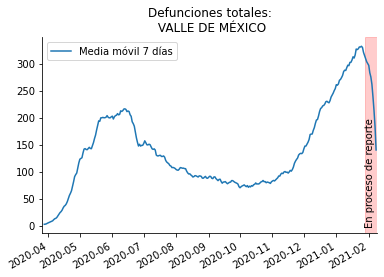

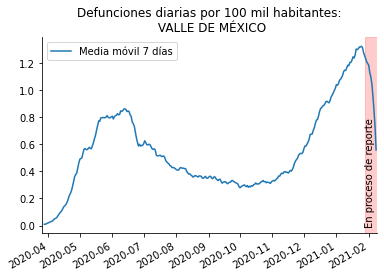

<Figure size 432x288 with 0 Axes>

In [10]:
# Valle de México 

#document.add_heading('Valle de México', level=1)

muertes_valle_mexico = base_covid_muertes_covid19[(base_covid_muertes_covid19['ENTIDAD_UM']==9) | (base_covid_muertes_covid19['ENTIDAD_UM']==15)]
contagios_valle_mexico = base_covid_contagios[(base_covid_contagios['ENTIDAD_UM']==9) | (base_covid_contagios['ENTIDAD_UM']==15)]

# Gráfica defunciones

muertes_valle_mexico['DEF_al_dia'] = muertes_valle_mexico.groupby('FECHA_DEF')['DEF'].transform('count')
media_movil_valle = muertes_valle_mexico.groupby('FECHA_DEF')['DEF_al_dia'].unique().rolling(window=7).mean()
media_movil_valle_100_mil = (muertes_valle_mexico.groupby('FECHA_DEF')['DEF_al_dia'].unique().rolling(window=7).mean()/(poblacion['POBLACION'][9]+poblacion['POBLACION'][15]))*100000

media_movil_valle.plot()
plt.title('Defunciones totales:\n VALLE DE MÉXICO')
plt.legend(['Media móvil 7 días'])
sns.despine()
plt.ylabel('')
plt.xlabel('')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,0,'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2+'graficaVALLEMEXICO.png')
plt.show()
plt.clf()


media_movil_valle_100_mil.plot()
plt.title('Defunciones diarias por 100 mil habitantes:\n VALLE DE MÉXICO')
plt.legend(['Media móvil 7 días'])
sns.despine()
plt.xlabel('')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,0,'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2+'graficaVALLEMEXICO2.png')
plt.show()
plt.clf()                         


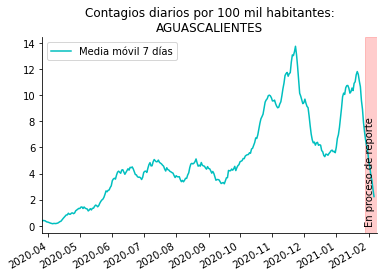

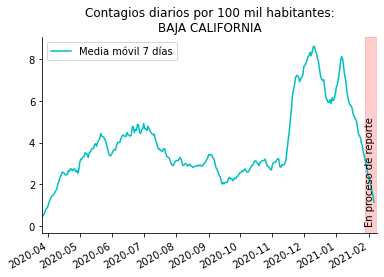

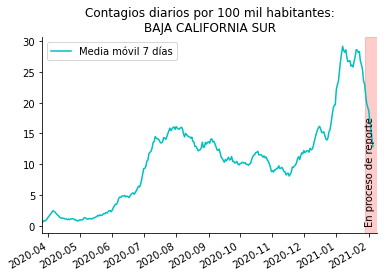

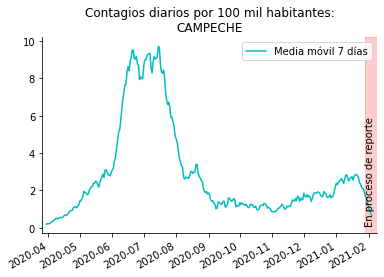

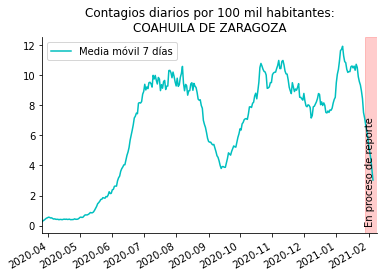

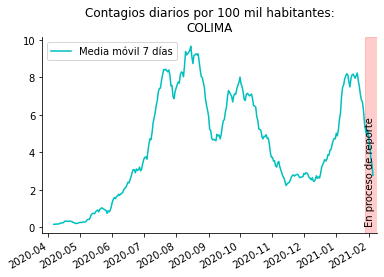

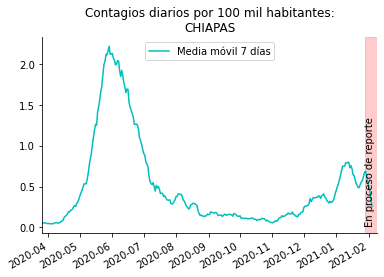

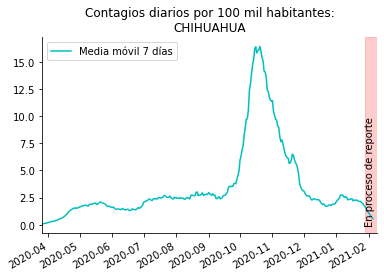

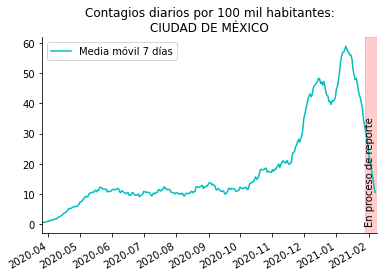

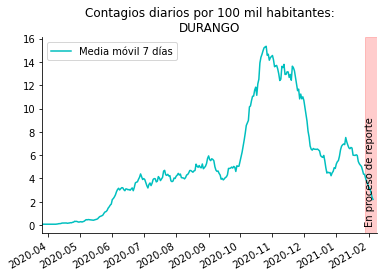

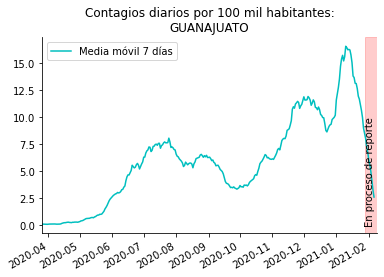

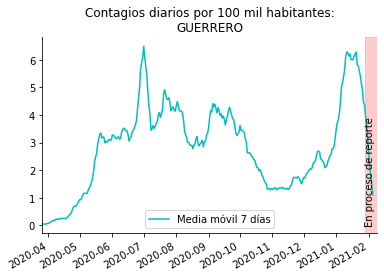

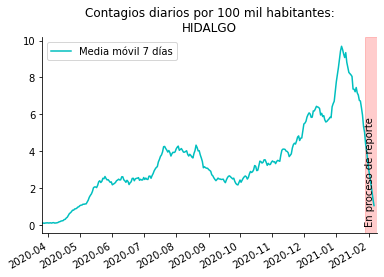

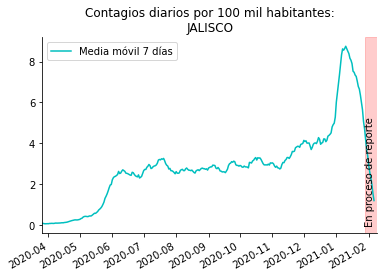

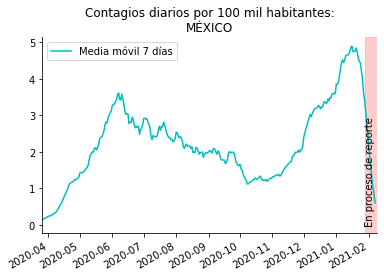

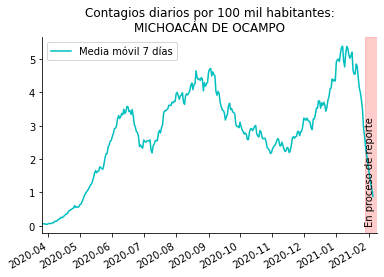

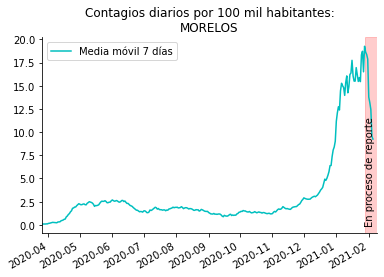

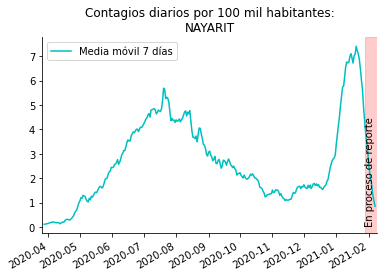

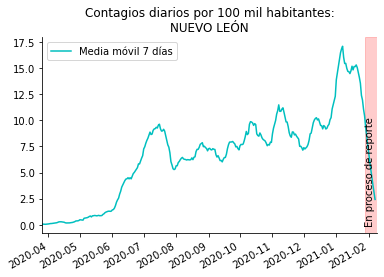

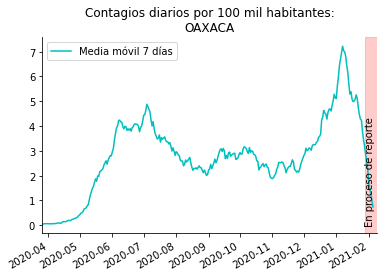

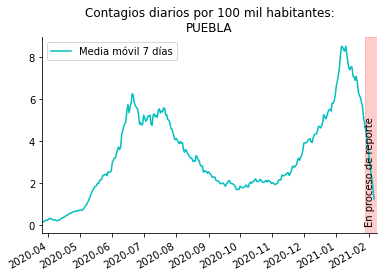

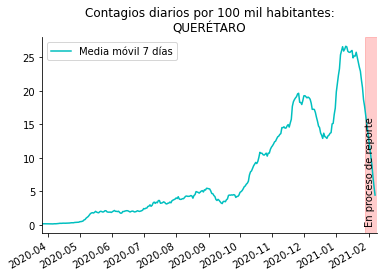

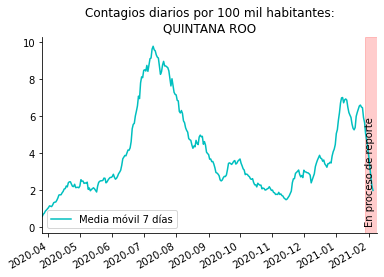

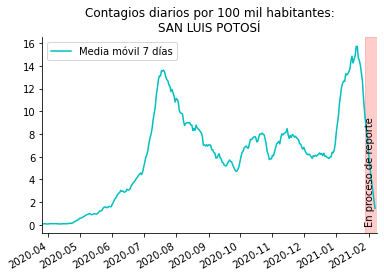

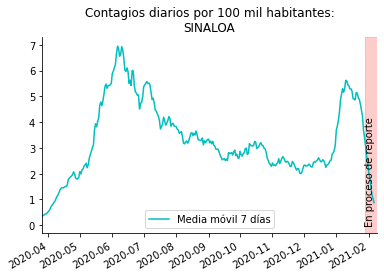

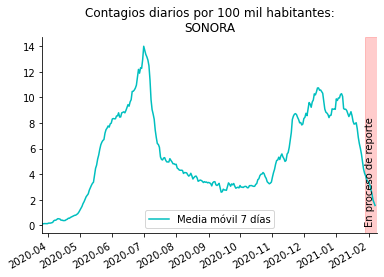

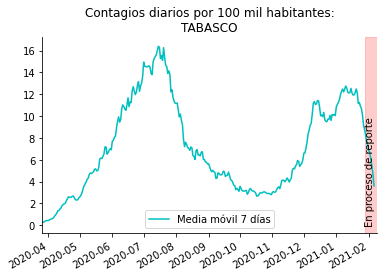

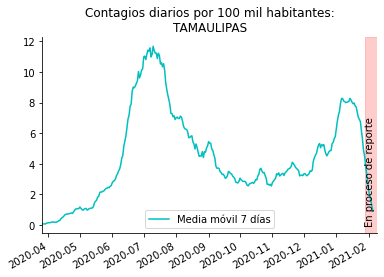

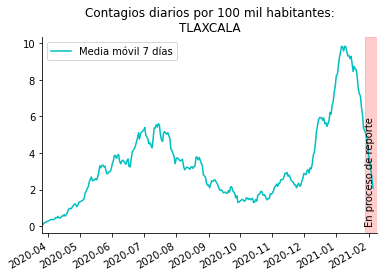

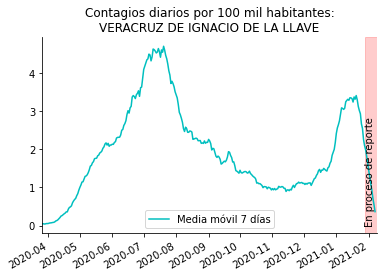

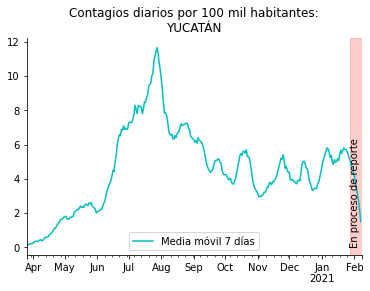

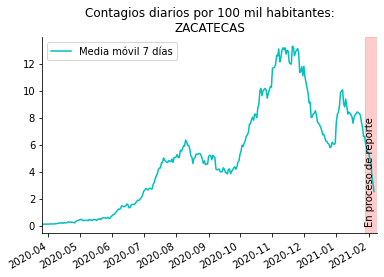

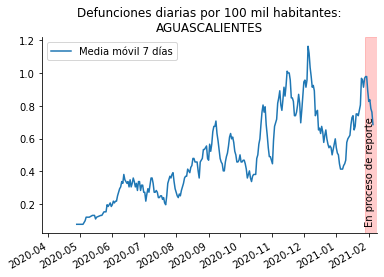

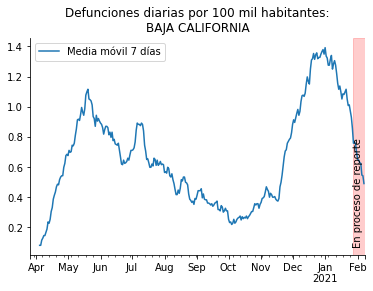

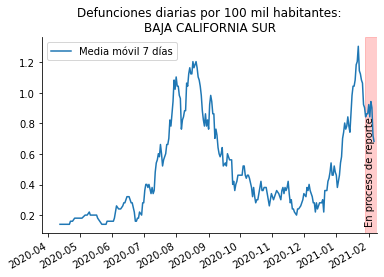

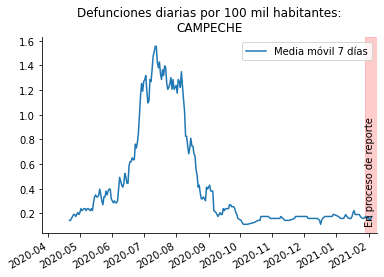

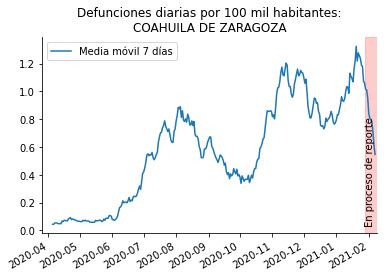

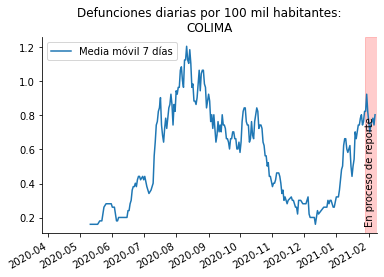

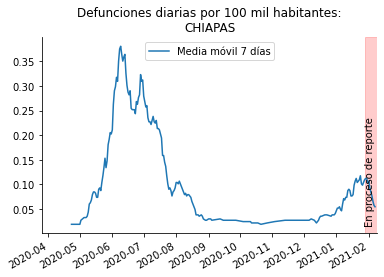

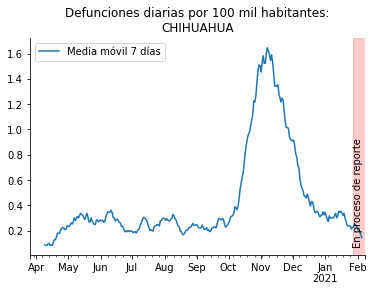

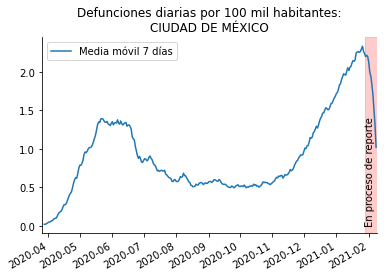

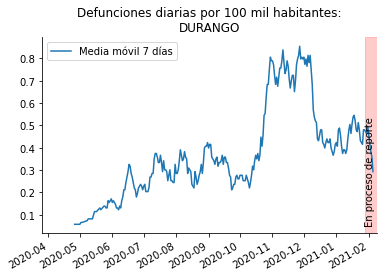

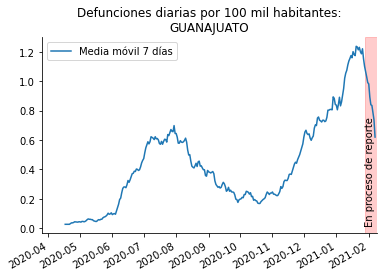

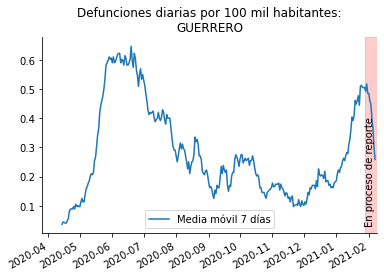

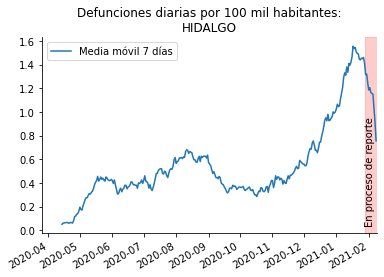

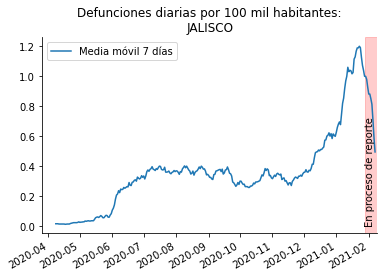

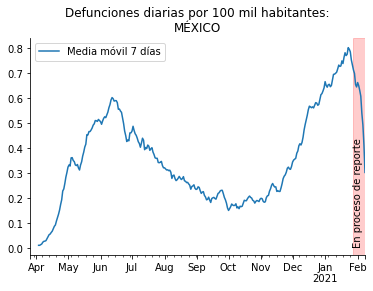

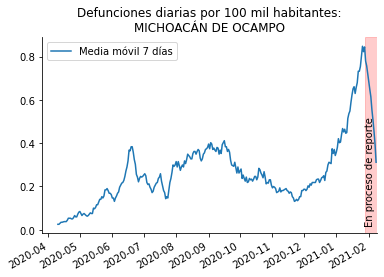

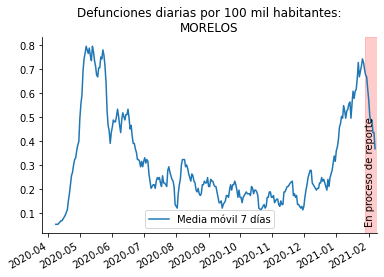

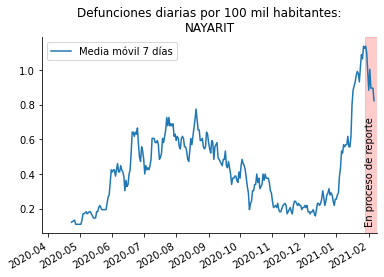

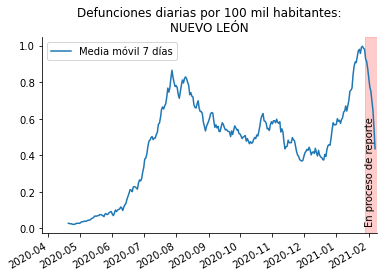

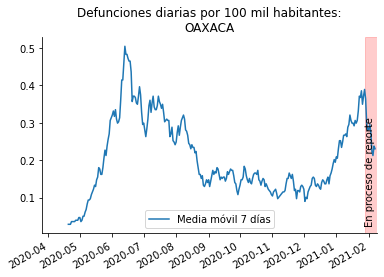

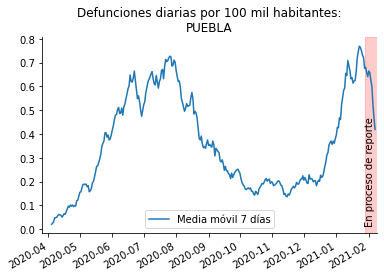

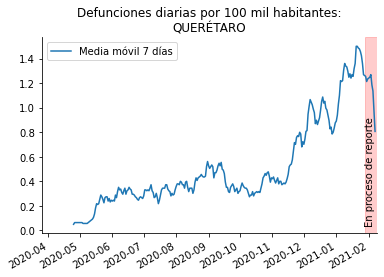

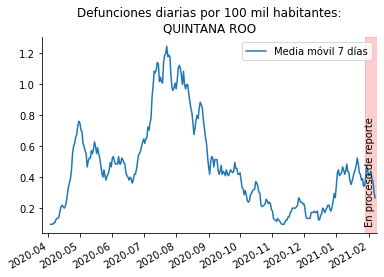

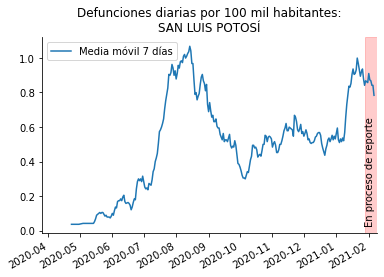

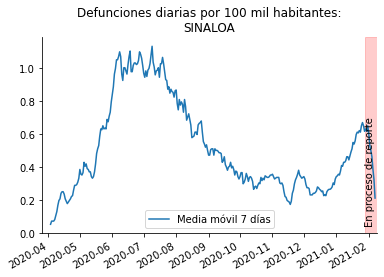

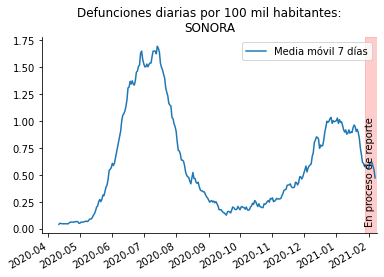

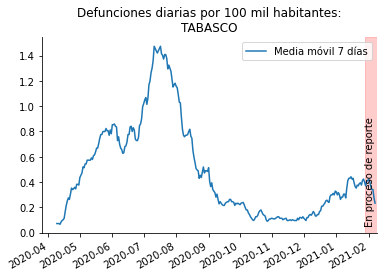

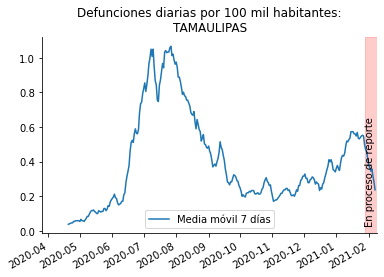

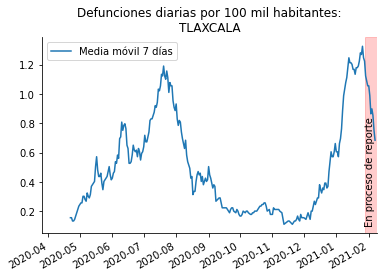

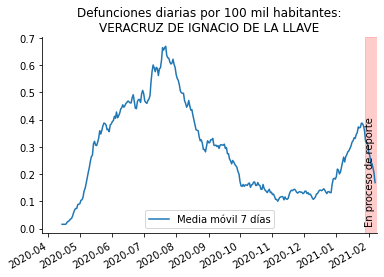

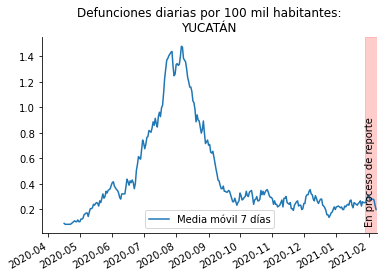

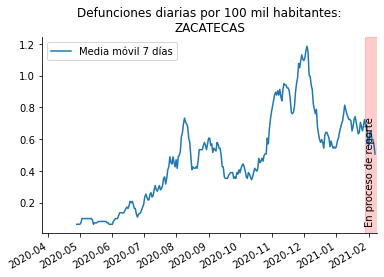

Ya


<Figure size 432x288 with 0 Axes>

In [11]:
# Cálculo de medias móviles 

x = range(1,33)
dfs = {}
dfs2 = {}
dfs2_100_mil = {}

cns = {}
cns2 = {}
cns2_100_mil = {}

for i in x:
    # Llena diccionarios con bases filtradas por estado 
    cns[i] = base_covid_contagios[base_covid_contagios['ENTIDAD_UM']== i ]
    cns[i]['CONT_al_dia'] = cns[i].groupby('FECHA_SINTOMAS')['CONT'].transform('count')
    cns2[i] = cns[i].groupby('FECHA_SINTOMAS')['CONT_al_dia'].unique().rolling(window=7).mean()
    cns2_100_mil[i] = (cns[i].groupby('FECHA_SINTOMAS')['CONT_al_dia'].unique().rolling(window=7).mean() /poblacion['POBLACION'][i])*100000
    cns2[i].plot(color='c')
    plt.title('Contagios totales:' + '\n' + estados2['ENTIDAD_FEDERATIVA'][i])
    sns.despine()
    plt.legend(['Media móvil 7 días'])
    plt.ylabel('')
    plt.xlabel('')
    plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
    plt.axvspan(corte,hoy,color='r',alpha=0.2)
    plt.text(corte,np.min(cns2[i]),'En proceso de reporte',fontsize=10,rotation=90)
    plt.savefig(path2 +'grafica'+ estados2['ENTIDAD_FEDERATIVA'][i] +'3.png')
    plt.clf()
    cns2_100_mil[i].plot(color='c')
    plt.title('Contagios diarios por 100 mil habitantes:'  + '\n' +  estados2['ENTIDAD_FEDERATIVA'][i])
    sns.despine()
    plt.legend(['Media móvil 7 días'])
    plt.xlabel('')
    plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
    plt.axvspan(corte,hoy,color='r',alpha=0.2)
    plt.text(corte,np.min(cns2_100_mil[i]),'En proceso de reporte',fontsize=10,rotation=90)
    plt.savefig(path2 +'grafica'+ estados2['ENTIDAD_FEDERATIVA'][i] +'4.png')
    plt.show()
    plt.clf()
    
dfs = {}
dfs2 = {}
dfs2_100_mil = {}

for i in x:
    # Llena diccionarios con bases filtradas por estado 
    dfs[i] = base_covid_muertes_covid19[base_covid_muertes_covid19['ENTIDAD_UM']== i ]
    dfs[i]['DEF_al_dia'] = dfs[i].groupby('FECHA_DEF')['DEF'].transform('count')
    dfs2[i] = dfs[i].groupby('FECHA_DEF')['DEF_al_dia'].unique().rolling(window=7).mean() 
    dfs2_100_mil[i] = ( dfs[i].groupby('FECHA_DEF')['DEF_al_dia'].unique().rolling(window=7).mean() / poblacion['POBLACION'][i] ) * 100000
    dfs2[i].plot()
    plt.title('Defunciones totales:\n' + estados2['ENTIDAD_FEDERATIVA'][i])
    sns.despine()
    plt.legend(['Media móvil 7 días'])
    plt.ylabel('')
    plt.xlabel('')
    plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
    plt.axvspan(corte,hoy,color='r',alpha=0.2)
    plt.text(corte,np.min(dfs2[i]),'En proceso de reporte',fontsize=10,rotation=90)
    plt.savefig(path2+'grafica'+ estados2['ENTIDAD_FEDERATIVA'][i] +'.png')
    plt.clf()
    dfs2_100_mil[i].plot()
    plt.title('Defunciones diarias por 100 mil habitantes:\n' + estados2['ENTIDAD_FEDERATIVA'][i])
    sns.despine()
    plt.legend(['Media móvil 7 días'])
    plt.xlabel('')
    plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
    plt.axvspan(corte,hoy,color='r',alpha=0.2)
    plt.text(corte,np.min(dfs2_100_mil[i]),'En proceso de reporte',fontsize=10,rotation=90)
    plt.savefig(path2+'grafica'+ estados2['ENTIDAD_FEDERATIVA'][i] +'2.png')
    plt.show()
    plt.clf()
    
print('Ya')

In [12]:
# Cuadros de Tendencia 

#TENDENCIAS
edos_tend=estados.iloc[0:32,1:2] #df de los estados

edos_tend['TENDENCIA CONTAGIOS']='' #agregamos columna vacia

for i in x:
    edos_tend.iloc[i-1,-1]='ESTABLE'
    if cns2[i][-12]<=(cns2[i][-26]*0.95) and cns2[i][-1]<=(cns2[i][-14]*0.95):
        edos_tend.iloc[i-1,-1]='A LA BAJA'
    elif cns2[i][-12]>=(cns2[i][-26]*1.05) or cns2[i][-1]>=(cns2[i][-14]*1.05):
        edos_tend.iloc[i-1,-1]='AL ALZA'

edos_tend['TENDENCIA DEFUNCIONES']='' #agregamos columna vacia

for i in x:
    edos_tend.iloc[i-1,-1]='ESTABLE'
    if dfs2[i][-12]<=(dfs2[i][-26]*0.95) and dfs2[i][-1]<=(dfs2[i][-14]*0.95):
        edos_tend.iloc[i-1,-1]='A LA BAJA'
    elif dfs2[i][-12]>=(dfs2[i][-26]*1.05) or dfs2[i][-1]>=(dfs2[i][-14]*1.05):
        edos_tend.iloc[i-1,-1]='AL ALZA'
        
edos_tend

,ENTIDAD_FEDERATIVA,TENDENCIA CONTAGIOS,TENDENCIA DEFUNCIONES
0,AGUASCALIENTES,A LA BAJA,AL ALZA
1,BAJA CALIFORNIA,A LA BAJA,A LA BAJA
2,BAJA CALIFORNIA SUR,ESTABLE,AL ALZA
3,CAMPECHE,A LA BAJA,ESTABLE
4,COAHUILA DE ZARAGOZA,A LA BAJA,AL ALZA
5,COLIMA,A LA BAJA,AL ALZA
6,CHIAPAS,A LA BAJA,AL ALZA
7,CHIHUAHUA,A LA BAJA,A LA BAJA
8,CIUDAD DE MÉXICO,A LA BAJA,AL ALZA
9,DURANGO,A LA BAJA,AL ALZA


In [13]:
con_alza= edos_tend['TENDENCIA CONTAGIOS'] == 'AL ALZA'
con_est= edos_tend['TENDENCIA CONTAGIOS'] == 'ESTABLE'
con_baja= edos_tend['TENDENCIA CONTAGIOS'] == 'A LA BAJA'

def_alza= edos_tend['TENDENCIA DEFUNCIONES'] == 'AL ALZA'
def_est= edos_tend['TENDENCIA DEFUNCIONES'] == 'ESTABLE'
def_baja= edos_tend['TENDENCIA DEFUNCIONES'] == 'A LA BAJA'

resumen={'Tendencia':['AL ALZA', 'ESTABLE', 'A LA BAJA'],
        'Contagios':[con_alza.sum(),con_est.sum(),con_baja.sum()],
        'Defunciones':[def_alza.sum(),def_est.sum(),def_baja.sum()]}
resumen_tend=pd.DataFrame(resumen)
resumen_tend

,Tendencia,Contagios,Defunciones
0,AL ALZA,1,17
1,ESTABLE,2,9
2,A LA BAJA,29,6


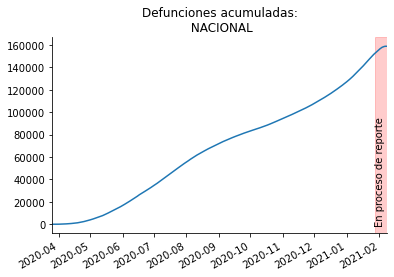

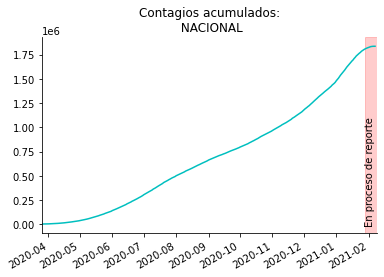

<Figure size 432x288 with 0 Axes>

In [14]:
# Gráficas acumuladas nacionales 

nad = base_covid_nacional.groupby('FECHA_DEF')['DEF_al_dia'].unique().cumsum()

nad = pd.DataFrame(nad).iloc[:,0].apply(lambda x: int(x))

nac = cnac.groupby('FECHA_SINTOMAS')['CONT_al_dia'].unique().cumsum()

nac = pd.DataFrame(nac).iloc[:,0].apply(lambda x: int(x))

nad.plot()
plt.title('Defunciones acumuladas:\n NACIONAL')
plt.xlabel('')
sns.despine()
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,0,'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2+'graficaNACIONAL_acum' +'.png')
plt.show()
plt.clf()
nac.plot(color='c')
sns.despine()
plt.title('Contagios acumulados:\n NACIONAL')
plt.xlabel('')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,0,'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2+'graficaNACIONAL2_acum' +'.png')
plt.show()
plt.clf()

In [15]:
# Tablas con media movil con todas las fechas 
corte_string = datetime.datetime.strftime(corte,'%Y-%m-%d')

base = datetime.datetime.today()
base = base.replace(hour=0, minute=0, second=0, microsecond=0)
# MUEVE ESTO 
date_list = [base - datetime.timedelta(days=y) for y in range(89)]

fechas = pd.DataFrame(date_list)
fechas.columns = ['Fecha']

datos_tabla = {}
datos_tabla2 = {}
datos_tabla3 = {}

for i in x: 
    dfs[i]['FECHA_DEF'] = pd.to_datetime(dfs[i]['FECHA_DEF'])
    datos_tabla[i] = pd.merge(dfs[i][['FECHA_DEF','DEF_al_dia']],fechas,left_on='FECHA_DEF',right_on='Fecha',how='outer')
    datos_tabla2[i] = datos_tabla[i].groupby('Fecha')['DEF_al_dia'].unique().apply(lambda x: np.nan_to_num(x)).apply(lambda x: int(x)).rolling(window=7).mean()[corte_string]
    datos_tabla3[i] = (datos_tabla2[i] / poblacion['POBLACION'][i])*100000

datos_tabla_con = {}
datos_tabla2_con = {}
datos_tabla3_con = {}

for i in x: 
    cns[i]['FECHA_SINTOMAS'] = pd.to_datetime(cns[i]['FECHA_SINTOMAS'])
    datos_tabla_con[i] = pd.merge(cns[i][['FECHA_SINTOMAS','CONT_al_dia']],fechas,left_on='FECHA_SINTOMAS',right_on='Fecha',how='outer')
    datos_tabla2_con[i] = datos_tabla_con[i].groupby('Fecha')['CONT_al_dia'].unique().apply(lambda x: np.nan_to_num(x)).apply(lambda x: int(x)).rolling(window=7).mean()[corte_string]
    datos_tabla3_con[i] = (datos_tabla2_con[i] / poblacion['POBLACION'][i])*100000
    


In [16]:
#Aquí se guardan las tablas
corte_string_2 = datetime.datetime.strftime(corte,'%Y-%m-%d')

tabla_nacional={'INDICADOR': ['DEFUNCIONES DIARIAS','DEFUNCIONES DIARIAS POR 100 MIL HABITANTES','DEFUNCIONES ACUMULADAS','DEFUNCIONES ACUMULADAS POR 100 MIL HABITANTES','CONTAGIOS DIARIOS','CONTAGIOS DIARIOS POR 100 MIL HABITANTES','CONTAGIOS ACUMULADOS','CONTAGIOS ACUMULADOS POR 100 MIL HABITANTES'],
      'VALOR HOY': [media_movil_nacional[corte_string_2],media_movil_nacional_por_100[corte_string_2],base_covid_muertes_covid19.shape[0],(base_covid_muertes_covid19.shape[0]/poblacion['POBLACION'][0])*100000,cnac2[corte_string_2],cnac2_100_mil[corte_string_2],base_covid.shape[0],(base_covid.shape[0]/poblacion['POBLACION'][0])*100000]}
tabla_nacional=pd.DataFrame(tabla_nacional)
tabla_nacional

with pd.ExcelWriter(path+'tablas/Tablas_'+string+'.xlsx') as writer:
    resumen_tend.to_excel(writer,sheet_name='Tendencias')
    tabla_nacional.to_excel(writer, sheet_name='Resumen Nacional')

In [17]:
otro_corte=corte-datetime.timedelta(days=7)
otro_corte=datetime.datetime.strftime(otro_corte,'%Y-%m-%d')
otro_corte

'2021-01-21'

In [18]:
#Llamamos a las tablas del pasado
corte_semana = hoy - datetime.timedelta(days=7)
semana_str=datetime.datetime.strftime(corte_semana,'%d/%m/%Y')

semana_ant=datetime.datetime.strftime(corte_semana,'%y%m%d') #Fecha de la semana anterior, se cambia a mano

tend_ants=pd.read_excel(path+'tablas/Tablas_'+semana_ant+'.xlsx',sheet_name='Tendencias',index_col=0)
resumen_ants=pd.read_excel(path+'tablas/Tablas_'+semana_ant+'.xlsx',sheet_name='Resumen Nacional',index_col=0)

tabla_nacional['VALOR SEMANA PASADA']= resumen_ants['VALOR HOY']
tabla_nacional.iloc[0,2]=media_movil_nacional[otro_corte]
tabla_nacional.iloc[1,2]=media_movil_nacional_por_100[otro_corte]
tabla_nacional.iloc[4,2]=cnac2[otro_corte]
tabla_nacional.iloc[5,2]=cnac2_100_mil[otro_corte]

tabla_nacional


,INDICADOR,VALOR HOY,VALOR SEMANA PASADA
0,DEFUNCIONES DIARIAS,9.694286e+02,1.029429e+03
1,DEFUNCIONES DIARIAS POR 100 MIL HABITANTES,8.110286e-01,8.612249e-01
2,DEFUNCIONES ACUMULADAS,1.588100e+05,1.517120e+05
3,DEFUNCIONES ACUMULADAS POR 100 MIL HABITANTES,1.328612e+02,1.269230e+02
4,CONTAGIOS DIARIOS,8.703429e+03,1.233800e+04
5,CONTAGIOS DIARIOS POR 100 MIL HABITANTES,7.281330e+00,1.032203e+01
6,CONTAGIOS ACUMULADOS,1.835962e+06,1.776154e+06
7,CONTAGIOS ACUMULADOS POR 100 MIL HABITANTES,1.535975e+03,1.485939e+03


In [19]:
tend_ants=tend_ants.rename(columns={'Tendencia':'Tendencia hace una semana'})
tend_ants

,Tendencia hace una semana,Contagios,Defunciones
0,AL ALZA,9,28
1,ESTABLE,3,1
2,A LA BAJA,20,3


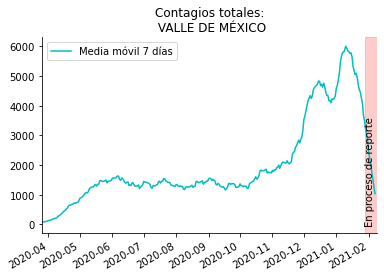

<Figure size 432x288 with 0 Axes>

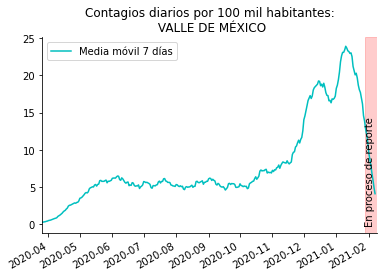

Ya


<Figure size 432x288 with 0 Axes>

In [20]:
# Gráficas contagios VALLE DE MEXICO 

media_contagios_valle = pd.DataFrame(cns2[15])+pd.DataFrame(cns2[9])
media_contagios_valle_100_mil = (media_contagios_valle*100000)/(poblacion['POBLACION'][9]+poblacion['POBLACION'][15])

media_contagios_valle.plot(color='c')
plt.title('Contagios totales:\n VALLE DE MÉXICO')
sns.despine()
plt.legend(['Media móvil 7 días'])
plt.ylabel('')
plt.xlabel('')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,0,'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2+'grafica'+ 'VALLEMEXICO3' +'.png')
plt.show()
plt.clf()


media_contagios_valle_100_mil.plot(color='c')
plt.title('Contagios diarios por 100 mil habitantes:\n VALLE DE MÉXICO')
plt.legend(['Media móvil 7 días'])
sns.despine()
plt.xlabel('')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,0,'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2+'grafica'+ 'VALLEMEXICO4' +'.png')
plt.show()
plt.clf()

print('Ya')

In [21]:
#Valle de Mexico en la tabla

valle={'ENTIDAD_FEDERATIVA':'VALLE DE MÉXICO','TENDENCIA CONTAGIOS': '','TENDENCIA DEFUNCIONES':''}
edos_tend=edos_tend.append(valle,ignore_index=True)
#media_contagios_valle = contagios_valle_mexico.groupby('FECHA_SINTOMAS')['CONT_al_dia'].unique().rolling(window=7).mean()


edos_tend.iloc[-1,-2]='ESTABLE'
if media_contagios_valle['CONT_al_dia'][-12]<=(media_contagios_valle['CONT_al_dia'][-26]*0.95) and media_contagios_valle['CONT_al_dia'][-1]<=(media_contagios_valle['CONT_al_dia'][-14]*0.95):
    edos_tend.iloc[-1,-2]='A LA BAJA'
elif media_contagios_valle['CONT_al_dia'][-12]>=(media_contagios_valle['CONT_al_dia'][-26]*1.05) or media_contagios_valle['CONT_al_dia'][-1]>=(media_contagios_valle['CONT_al_dia'][-14]*1.05):
    edos_tend.iloc[-1,-2]='AL ALZA'
    
edos_tend.iloc[-1,-1]='ESTABLE'
if media_movil_valle[-12]<=(media_movil_valle[-26]*0.95) and media_movil_valle[-1]<=(media_movil_valle[-14]*0.95):
    edos_tend.iloc[-1,-1]='A LA BAJA'
elif media_movil_valle[-12]>=(media_movil_valle[-26]*1.05) or media_movil_valle[-1]>=(media_movil_valle[-14]*1.05):
    edos_tend.iloc[-1,-1]='AL ALZA'
        

edos_tend

,ENTIDAD_FEDERATIVA,TENDENCIA CONTAGIOS,TENDENCIA DEFUNCIONES
0,AGUASCALIENTES,A LA BAJA,AL ALZA
1,BAJA CALIFORNIA,A LA BAJA,A LA BAJA
2,BAJA CALIFORNIA SUR,ESTABLE,AL ALZA
3,CAMPECHE,A LA BAJA,ESTABLE
4,COAHUILA DE ZARAGOZA,A LA BAJA,AL ALZA
5,COLIMA,A LA BAJA,AL ALZA
6,CHIAPAS,A LA BAJA,AL ALZA
7,CHIHUAHUA,A LA BAJA,A LA BAJA
8,CIUDAD DE MÉXICO,A LA BAJA,AL ALZA
9,DURANGO,A LA BAJA,AL ALZA


In [22]:
#DATAFRAME PARA MAPAS

# Creamos en índice 
id_entidades = pd.DataFrame(list(range(0,33)))
#poblacion['id_entidades'] = [1,2,3,4,7,8,5,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]

# Creamos la columna de defunciones diarias por 100K habitantes
defun_d_100 = pd.DataFrame(datos_tabla3, index = x)
defun_d_100 = pd.DataFrame(defun_d_100.iloc[1])
defun_d_100.columns = ['DEF_D_100']
poblacion['DEF_D_100'] = defun_d_100

# Creamos la columna de defunciones acumuladas por 100K habitantes 
dict_defun_a_100 = {}

for i in x: 
    dict_defun_a_100[i] = int(dfs[i]['DEF'].count()/poblacion['POBLACION'][i]*100000)

defun_a_100 = pd.DataFrame(dict_defun_a_100, index = x)
defun_a_100 = pd.DataFrame(defun_a_100.iloc[1])
defun_a_100.columns = ['DEF_A_100']
poblacion['DEF_A_100'] = defun_a_100

# Creamos la columnda de contagios diarios por 100K habitantes
con_d_100 = pd.DataFrame(datos_tabla3_con, index = x)
con_d_100 = pd.DataFrame(con_d_100.iloc[1])
con_d_100.columns = ['CON_D_100']
poblacion['CON_D_100'] = con_d_100

# Creamos la columna de contagios acumulados por 100K habitantes 
dict_con_a_100 = {}

for i in x: 
    dict_con_a_100[i] = int(cns[i]['CONT'].count()/poblacion['POBLACION'][i]*100000)

con_a_100 = pd.DataFrame(dict_con_a_100, index = x)
con_a_100 = pd.DataFrame(con_a_100.iloc[1])
con_a_100.columns = ['CON_A_100']
poblacion['CON_A_100'] = con_a_100

df = poblacion
df['id_entidades'] = [0,1,2,3,4,7,8,5,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
df

,ENTIDAD,POBLACION,DEF_D_100,DEF_A_100,CON_D_100,CON_A_100,id_entidades
0,NACIONAL,119530753,NaN,NaN,NaN,NaN,0
1,AGUASCALIENTES,1312544,0.968675,140.0,7.172549,1651.0,1
2,BAJA CALIFORNIA,3315766,0.758282,208.0,3.308867,1245.0,2
3,BAJA CALIFORNIA SUR,712029,0.902852,139.0,23.032770,3435.0,3
4,CAMPECHE,899931,0.111120,108.0,1.825537,893.0,4
5,COAHUILA,2954915,1.058769,179.0,7.169653,2061.0,7
6,COLIMA,711235,0.823517,144.0,5.523591,1349.0,8
7,CHIAPAS,5217908,0.109513,23.0,0.676243,159.0,5
8,CHIHUAHUA,3556574,0.228952,132.0,1.715134,1109.0,6
9,CIUDAD DE MÉXICO,8918653,2.234482,296.0,32.852495,5863.0,9


In [23]:
path3 = 'C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/mapa/'

import geopandas as gpd
import matplotlib.pyplot as plt 

#Definimos el mapa (queda como geoDataFrame) y el csv que utilizaremos

shapefile = path3+'Mexico_Polygon.shp' #https://www.igismap.com/download-mexico-shapefile-free-boundary-line-polygon/
#datafile = 'data/obesity.csv'

gdf = gpd.read_file(shapefile)[['name','geometry']] #[['geometry']]
gdf.columns = ['ENTIDAD', 'geometry']

gdf.head()

,ENTIDAD,geometry
0,Aguascalientes,"POLYGON ((-102.87418 21.85277, -102.87283 21.8..."
1,Baja California,"MULTIPOLYGON (((-118.36411 29.14631, -118.3648..."
2,Baja California Sur,"MULTIPOLYGON (((-112.07737 25.49453, -112.0771..."
3,Campeche,"MULTIPOLYGON (((-91.18573 18.95770, -91.18554 ..."
4,Chiapas,"MULTIPOLYGON (((-94.03396 16.02143, -94.03468 ..."


In [24]:
# Creamos el índice para poder emparejar con el otro dataframe
id_entidades_shp = pd.DataFrame([1,2,3,4,5,6,7,8,10,11,12,13,14,15,9,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])
gdf['id_entidades'] = id_entidades_shp

gdf

,ENTIDAD,geometry,id_entidades
0,Aguascalientes,"POLYGON ((-102.87418 21.85277, -102.87283 21.8...",1
1,Baja California,"MULTIPOLYGON (((-118.36411 29.14631, -118.3648...",2
2,Baja California Sur,"MULTIPOLYGON (((-112.07737 25.49453, -112.0771...",3
3,Campeche,"MULTIPOLYGON (((-91.18573 18.95770, -91.18554 ...",4
4,Chiapas,"MULTIPOLYGON (((-94.03396 16.02143, -94.03468 ...",5
5,Chihuahua,"POLYGON ((-109.07498 28.27249, -109.07087 28.2...",6
6,Coahuila,"POLYGON ((-103.96000 27.83531, -103.94578 27.8...",7
7,Colima,"MULTIPOLYGON (((-114.76002 18.34604, -114.7595...",8
8,Durango,"POLYGON ((-107.21013 25.41710, -107.18487 25.4...",10
9,Guanajuato,"POLYGON ((-102.09728 20.38649, -102.09713 20.3...",11


In [25]:
# Perform left merge to preserve every row in gdf.
merged = gdf.merge(df, left_on = 'id_entidades', right_on = 'id_entidades', how = 'left')
data = merged
# Replace NaN values to string 'No data'.
#merged.fillna('No data', inplace = True)
data

,ENTIDAD_x,geometry,id_entidades,ENTIDAD_y,POBLACION,DEF_D_100,DEF_A_100,CON_D_100,CON_A_100
0,Aguascalientes,"POLYGON ((-102.87418 21.85277, -102.87283 21.8...",1,AGUASCALIENTES,1312544,0.968675,140.0,7.172549,1651.0
1,Baja California,"MULTIPOLYGON (((-118.36411 29.14631, -118.3648...",2,BAJA CALIFORNIA,3315766,0.758282,208.0,3.308867,1245.0
2,Baja California Sur,"MULTIPOLYGON (((-112.07737 25.49453, -112.0771...",3,BAJA CALIFORNIA SUR,712029,0.902852,139.0,23.032770,3435.0
3,Campeche,"MULTIPOLYGON (((-91.18573 18.95770, -91.18554 ...",4,CAMPECHE,899931,0.111120,108.0,1.825537,893.0
4,Chiapas,"MULTIPOLYGON (((-94.03396 16.02143, -94.03468 ...",5,CHIAPAS,5217908,0.109513,23.0,0.676243,159.0
5,Chihuahua,"POLYGON ((-109.07498 28.27249, -109.07087 28.2...",6,CHIHUAHUA,3556574,0.228952,132.0,1.715134,1109.0
6,Coahuila,"POLYGON ((-103.96000 27.83531, -103.94578 27.8...",7,COAHUILA,2954915,1.058769,179.0,7.169653,2061.0
7,Colima,"MULTIPOLYGON (((-114.76002 18.34604, -114.7595...",8,COLIMA,711235,0.823517,144.0,5.523591,1349.0
8,Durango,"POLYGON ((-107.21013 25.41710, -107.18487 25.4...",10,DURANGO,1754754,0.480328,105.0,4.355515,1665.0
9,Guanajuato,"POLYGON ((-102.09728 20.38649, -102.09713 20.3...",11,GUANAJUATO,5853677,1.100651,133.0,8.522116,1889.0


In [26]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import matplotlib as mpl


edos_tend['ID']=[1,2,3,4,7,8,5,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
merged_2 = gdf.merge(edos_tend, left_on = 'id_entidades', right_on = 'ID', how = 'left')
data_2 = merged_2

data_2['TENDENCIA CONTAGIOS'] = data_2['TENDENCIA CONTAGIOS'].apply(lambda x: 0 if x == 'A LA BAJA' else (1 if x == 'ESTABLE' else 2))
data_2['TENDENCIA DEFUNCIONES'] = data_2['TENDENCIA DEFUNCIONES'].apply(lambda x: 0 if x == 'A LA BAJA' else ( 1 if x == 'ESTABLE' else 2))

data_2

,ENTIDAD,geometry,id_entidades,ENTIDAD_FEDERATIVA,TENDENCIA CONTAGIOS,TENDENCIA DEFUNCIONES,ID
0,Aguascalientes,"POLYGON ((-102.87418 21.85277, -102.87283 21.8...",1,AGUASCALIENTES,0,2,1
1,Baja California,"MULTIPOLYGON (((-118.36411 29.14631, -118.3648...",2,BAJA CALIFORNIA,0,0,2
2,Baja California Sur,"MULTIPOLYGON (((-112.07737 25.49453, -112.0771...",3,BAJA CALIFORNIA SUR,1,2,3
3,Campeche,"MULTIPOLYGON (((-91.18573 18.95770, -91.18554 ...",4,CAMPECHE,0,1,4
4,Chiapas,"MULTIPOLYGON (((-94.03396 16.02143, -94.03468 ...",5,CHIAPAS,0,2,5
5,Chihuahua,"POLYGON ((-109.07498 28.27249, -109.07087 28.2...",6,CHIHUAHUA,0,0,6
6,Coahuila,"POLYGON ((-103.96000 27.83531, -103.94578 27.8...",7,COAHUILA DE ZARAGOZA,0,2,7
7,Colima,"MULTIPOLYGON (((-114.76002 18.34604, -114.7595...",8,COLIMA,0,2,8
8,Durango,"POLYGON ((-107.21013 25.41710, -107.18487 25.4...",10,DURANGO,0,2,10
9,Guanajuato,"POLYGON ((-102.09728 20.38649, -102.09713 20.3...",11,GUANAJUATO,0,1,11


In [27]:
edos_tend

,ENTIDAD_FEDERATIVA,TENDENCIA CONTAGIOS,TENDENCIA DEFUNCIONES,ID
0,AGUASCALIENTES,A LA BAJA,AL ALZA,1
1,BAJA CALIFORNIA,A LA BAJA,A LA BAJA,2
2,BAJA CALIFORNIA SUR,ESTABLE,AL ALZA,3
3,CAMPECHE,A LA BAJA,ESTABLE,4
4,COAHUILA DE ZARAGOZA,A LA BAJA,AL ALZA,7
5,COLIMA,A LA BAJA,AL ALZA,8
6,CHIAPAS,A LA BAJA,AL ALZA,5
7,CHIHUAHUA,A LA BAJA,A LA BAJA,6
8,CIUDAD DE MÉXICO,A LA BAJA,AL ALZA,9
9,DURANGO,A LA BAJA,AL ALZA,10


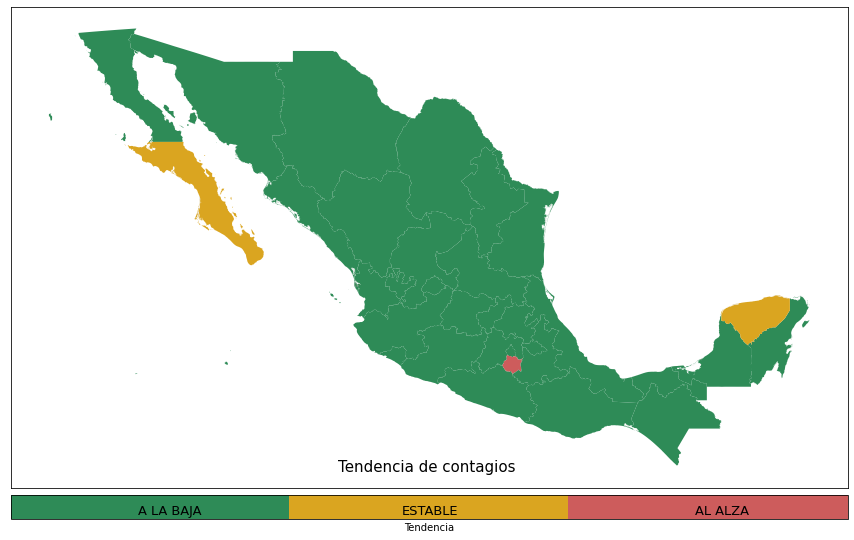

<Figure size 432x288 with 0 Axes>

In [28]:
fig, ax = plt.subplots(figsize = (15,11))
divider = make_axes_locatable(ax)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
cmap = mpl.cm.RdYlGn(np.linspace(0,1,5))
cmap = mpl.colors.ListedColormap(['seagreen','goldenrod','indianred'])
cax = divider.append_axes('bottom', size = '5%', pad = 0.1)

g = data_2.plot(column = 'TENDENCIA CONTAGIOS', ax = ax, cax=cax, cmap = cmap, legend=True,legend_kwds={'orientation':'horizontal'})
plt.title('Tendencia de contagios \n',fontsize=15)
cax.set_xlabel('Tendencia')
cax.text(0.305,0.35,'A LA BAJA',fontsize=13)
cax.xaxis.set_ticks([])
cax.text(0.935,0.35,'ESTABLE',fontsize=13)
cax.text(1.635,0.35,'AL ALZA',fontsize=13)
plt.savefig(path2+'tendencia_contagios.png',bbox_inches='tight')
plt.show()
plt.clf()

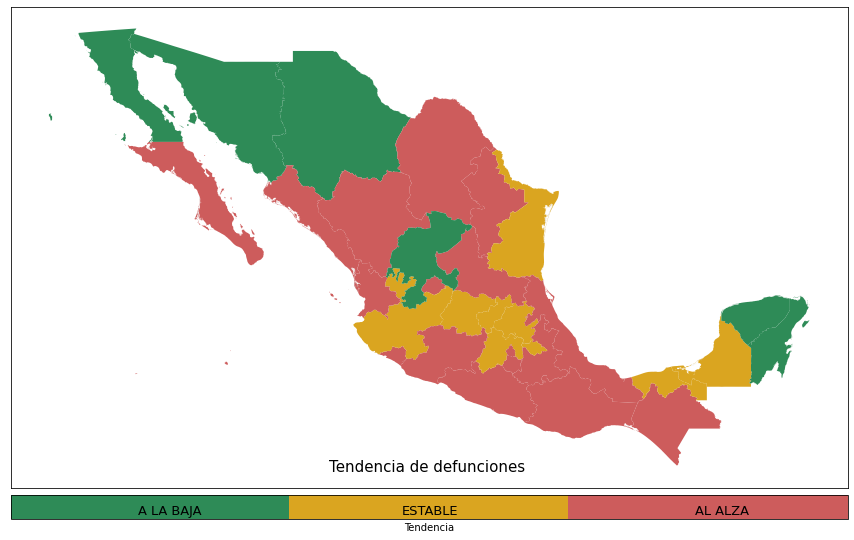

<Figure size 432x288 with 0 Axes>

In [29]:
fig, ax = plt.subplots(figsize = (15,11))
divider = make_axes_locatable(ax)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
cmap = mpl.cm.RdYlGn(np.linspace(0,1,3))
cmap = mpl.colors.ListedColormap(['seagreen','goldenrod','indianred'])

cax = divider.append_axes('bottom', size = '5%', pad = 0.1)

data_2.plot(column = 'TENDENCIA DEFUNCIONES', ax = ax, cax = cax, cmap = cmap, legend = True, legend_kwds={'orientation':'horizontal'})
plt.title('Tendencia de defunciones \n',fontsize=15)
cax.set_xlabel('Tendencia')
cax.text(0.305,0.35,'A LA BAJA',fontsize=13)
cax.xaxis.set_ticks([])
cax.text(0.935,0.35,'ESTABLE',fontsize=13)
cax.text(1.635,0.35,'AL ALZA',fontsize=13)
plt.savefig(path2+'tendencia_defunciones.png',bbox_inches='tight')
plt.show()
plt.clf()

In [30]:
edos_tend=edos_tend.drop(columns='ID')
edos_tend

,ENTIDAD_FEDERATIVA,TENDENCIA CONTAGIOS,TENDENCIA DEFUNCIONES
0,AGUASCALIENTES,A LA BAJA,AL ALZA
1,BAJA CALIFORNIA,A LA BAJA,A LA BAJA
2,BAJA CALIFORNIA SUR,ESTABLE,AL ALZA
3,CAMPECHE,A LA BAJA,ESTABLE
4,COAHUILA DE ZARAGOZA,A LA BAJA,AL ALZA
5,COLIMA,A LA BAJA,AL ALZA
6,CHIAPAS,A LA BAJA,AL ALZA
7,CHIHUAHUA,A LA BAJA,A LA BAJA
8,CIUDAD DE MÉXICO,A LA BAJA,AL ALZA
9,DURANGO,A LA BAJA,AL ALZA


# Bases Totales 

In [31]:
corte_def = hoy - datetime.timedelta(days=20)
corte_def = corte_def.replace(hour=0, minute=0, second=0, microsecond=0)
inicio = datetime.datetime.strptime('2020-26-03','%Y-%d-%m')
inicio = inicio.replace(hour=0, minute=0, second=0, microsecond=0)

In [32]:
base = pd.read_csv(path2+string+'COVID19MEXICO'+'.csv',encoding='latin1')
base_tot = base

base_tot['RESULTADO'] = base_tot['CLASIFICACION_FINAL'].apply(lambda x: 1 if x == 3 else 0)
base_tot['FECHA_DEF'] = base_tot['FECHA_DEF'].astype('str')
base_tot['FECHA_DEF'] = base_tot['FECHA_DEF'].apply(lambda x: 0 if x == '9999-99-99' else datetime.datetime.strptime(x,'%Y-%m-%d'))

base_tot['FECHA_SINTOMAS'] = base_tot['FECHA_SINTOMAS'].astype('str')
base_tot['FECHA_SINTOMAS'] = base_tot['FECHA_SINTOMAS'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

base_tot['FECHA_INGRESO'] = base_tot['FECHA_INGRESO'].astype('str')
base_tot['FECHA_INGRESO'] = base_tot['FECHA_INGRESO'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
base_tot['CONT'] = base_tot['RESULTADO']

In [ ]:
edades = base_tot.copy() 

# calculamos los ingresos totales para la base (ordenados por fecha de ingreso)
edades['ING'] = edades['FECHA_INGRESO'].apply(lambda x: 1) # columna de 1's para cada persona que fue a la UM 
#edades['ING_TOT_dia'] = edades.groupby('FECHA_INGRESO')['ING'].transform('count') # Visitas a la UM al día

# calculamos las muertes totales para la base (ordenados por fecha de ingreso)
edades['DEF'] = edades['FECHA_DEF'].apply(lambda x: 0 if x == 0 else 1)
#edades['DEF_TOT_dia'] = edades.groupby('FECHA_INGRESO')['DEF'].transform('sum') # ordenamos por fecha de ingreso

# Datos y Gráfica % de pacientes por edad 

edades['EDAD'] = edades['EDAD'].apply(lambda x: int(x))
edades_int = edades.copy()

mas_70 = edades[edades['EDAD'] > 70]
entre_60y70 = edades[edades['EDAD'] <= 70]
entre_50y60 = entre_60y70[entre_60y70['EDAD'] <= 60]
entre_40y50 = entre_50y60[entre_50y60['EDAD'] <= 50]
entre_30y40 = entre_40y50[entre_40y50['EDAD'] <= 40]
entre_20y30 = entre_30y40[entre_30y40['EDAD'] <= 30]
menos_20 = entre_20y30[entre_20y30['EDAD'] <= 20] # lo hice así para ir disminuyendo los datos de donde se tendría que seleccionar 

# Ahora eliminamos los remanentes que no queremos, ej. todos los menores de 60 en la de entre_60y70
entre_60y70 = entre_60y70[entre_60y70['EDAD'] > 60]
entre_50y60 = entre_50y60[entre_50y60['EDAD'] > 50]
entre_40y50 = entre_40y50[entre_40y50['EDAD'] > 40]
entre_30y40 = entre_30y40[entre_30y40['EDAD'] > 30]
entre_20y30 = entre_20y30[entre_20y30['EDAD'] > 20]

# Sacamos las cantidades totales INGRESOS
mas_70['ING_al_dia'] = mas_70.groupby('FECHA_INGRESO')['ING'].transform('count')
entre_60y70['ING_al_dia'] = entre_60y70.groupby('FECHA_INGRESO')['ING'].transform('count')
entre_50y60['ING_al_dia'] = entre_50y60.groupby('FECHA_INGRESO')['ING'].transform('count')
entre_40y50['ING_al_dia'] = entre_40y50.groupby('FECHA_INGRESO')['ING'].transform('count')
entre_30y40['ING_al_dia'] = entre_30y40.groupby('FECHA_INGRESO')['ING'].transform('count')
entre_20y30['ING_al_dia'] = entre_20y30.groupby('FECHA_INGRESO')['ING'].transform('count')
menos_20['ING_al_dia'] = menos_20.groupby('FECHA_INGRESO')['ING'].transform('count')

In [ ]:
# Pacientes fallecidos con COVID/ Pacientes totales con COVID 

letcov = base_tot[base_tot['CLASIFICACION_FINAL'] == 3]
letcov['ING'] = letcov['FECHA_INGRESO'].apply(lambda x: 1) # columna de 1's para cada persona que fue a la UM 
letcov['ING_al_dia'] = letcov.groupby('FECHA_INGRESO')['ING'].transform('count') # Visitas a la UM al día
letcov['DEF'] = letcov['FECHA_DEF'].apply(lambda x: 0 if x == 0 else 1) # columna con 1's para los muertos 
letcov['DEF_al_dia'] = letcov.groupby('FECHA_INGRESO')['DEF'].transform('sum')
letcov['TASA_LET'] = letcov['DEF_al_dia']/letcov['ING_al_dia']

# Agrupamos todos los casos por fecha de ingreso con el unique() y calculamos el promedio móvil (7 días)
mm_letcov = letcov.groupby('FECHA_INGRESO')['TASA_LET'].unique().rolling(window=7).mean()
mm_letcov = mm_letcov.apply(lambda x: float(x))

# Graficamos - LETALIDAD TOTAL
sns.set_context(rc={"lines.linewidth": 2})
ax = mm_letcov.plot(figsize = (10,7), linewidth = 4, c = sns.color_palette("GnBu_d")[2])

sns.despine()
#plt.title('Tasa de Letalidad COVID19 NACIONAL')
plt.legend(['Media móvil 7 días'])
plt.xlabel('Fecha de Ingreso', fontsize=12)
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte_def,hoy,color='r',alpha=0.2)
plt.ylim(0.00, 0.25)
plt.text(corte_def,0.01,'Periodo Insuficiente',fontsize=10.5,rotation=90)
# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.savefig(path2+'grafica'+ 'mm_letcov' +'.png', bbox_inches='tight')
plt.clf()
plt.show()

In [ ]:
gen = base_tot.copy()
gen = gen[gen['RESULTADO'] == 1] # restringimos a los casos con covid 
gen['DEF'] = gen['FECHA_DEF'].apply(lambda x: 0 if x == 0 else 1)

# Mujeres fallecidas con COVID / Mujeres con COVID 
mlet = gen.copy()
mlet = mlet[mlet['SEXO'] == 1] # base solo con mujeres
mlet['ING_al_dia'] = mlet.groupby('FECHA_INGRESO')['RESULTADO'].transform('count') # Visitas mujeres al UM (diarias x fecha de ingreso)
mlet['DEF_al_dia'] = mlet.groupby('FECHA_INGRESO')['DEF'].transform('sum')
mlet['TASA_LET'] = mlet['DEF_al_dia']/mlet['ING_al_dia']

# Agrupamos todos los casos por fecha de ingreso con el unique() y calculamos el promedio móvil (7 días)
mm_mlet = mlet.groupby('FECHA_INGRESO')['TASA_LET'].unique().rolling(window=7).mean()
mm_mlet = mm_mlet.apply(lambda x: float(x))

# Hombres fallecidos con COVID / Hombres con COVID 
hlet = gen.copy()
hlet = hlet[hlet['SEXO'] == 2] # base solo con mujeres
hlet['ING_al_dia'] = hlet.groupby('FECHA_INGRESO')['RESULTADO'].transform('count') # Visitas hombres al UM (diarias x fecha de ingreso)
hlet['DEF_al_dia'] = hlet.groupby('FECHA_INGRESO')['DEF'].transform('sum')
hlet['TASA_LET'] = hlet['DEF_al_dia']/hlet['ING_al_dia']

# Agrupamos todos los casos por fecha de ingreso con el unique() y calculamos el promedio móvil (7 días)
mm_hlet = hlet.groupby('FECHA_INGRESO')['TASA_LET'].unique().rolling(window=7).mean()
mm_hlet = mm_hlet.apply(lambda x: float(x))


# Graficamos todas 
sns.set_palette('PuBu_r')
ax = mm_letcov.plot(figsize = (10,7), c= 'firebrick', linewidth = 3.5, label = 'Total')
mm_mlet.plot(label = 'Mujeres', c = 'lightblue')
mm_hlet.plot(label = 'Hombres')

sns.despine()
#plt.title('Tasa de Letalidad COVID19 - Total y por género')
plt.legend('Media móvil 7 días')
plt.xlabel('Fecha de Ingreso', fontsize = 12)
plt.xlim([datetime.datetime.strptime('2020-26-03', '%Y-%d-%m'), hoy])
#plt.ylim(0.00, 0.7)
plt.axvspan(corte_def, hoy, color = 'r', alpha = 0.2)
plt.text(corte_def, 0.02, 'Periodo Insuficiente', fontsize = 10, rotation = 90)
plt.legend()

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.savefig(path2 + 'grafica' + 'letalidadcov_gen' + '.png', bbox_inches = 'tight')
#plt.clf()
plt.show()

In [ ]:
# Calculamos la evolución de la tasa de Letalidad en el tiempo (por grupos de edades)

# Pacientes con COVID 

cl_mas_70 = mas_70[['FECHA_SINTOMAS','FECHA_INGRESO','FECHA_DEF','EDAD','RESULTADO','ING','DEF']]
cl_entre_60y70 = entre_60y70[['FECHA_SINTOMAS','FECHA_INGRESO','FECHA_DEF','EDAD','RESULTADO','ING','DEF']]
cl_entre_50y60 = entre_50y60[['FECHA_SINTOMAS','FECHA_INGRESO','FECHA_DEF','EDAD','RESULTADO','ING','DEF']]
cl_entre_40y50 = entre_40y50[['FECHA_SINTOMAS','FECHA_INGRESO','FECHA_DEF','EDAD','RESULTADO','ING','DEF']]
cl_entre_30y40 = entre_30y40[['FECHA_SINTOMAS','FECHA_INGRESO','FECHA_DEF','EDAD','RESULTADO','ING','DEF']]
cl_entre_20y30 = entre_20y30[['FECHA_SINTOMAS','FECHA_INGRESO','FECHA_DEF','EDAD','RESULTADO','ING','DEF']]
cl_menos_20 = menos_20[['FECHA_SINTOMAS','FECHA_INGRESO','FECHA_DEF','EDAD','RESULTADO','ING','DEF']]

cl_mas_70 = cl_mas_70[cl_mas_70['RESULTADO'] == 1]
cl_entre_60y70 = cl_entre_60y70[cl_entre_60y70['RESULTADO'] == 1]
cl_entre_50y60 = cl_entre_50y60[cl_entre_50y60['RESULTADO'] == 1]
cl_entre_40y50 = cl_entre_40y50[cl_entre_40y50['RESULTADO'] == 1]
cl_entre_30y40 = cl_entre_30y40[cl_entre_30y40['RESULTADO'] == 1]
cl_entre_20y30 = cl_entre_20y30[cl_entre_20y30['RESULTADO'] == 1]
cl_menos_20 = cl_menos_20[cl_menos_20['RESULTADO'] == 1]

# Agrupamos, por fecha de ingreso, la cantidad de pacientes que acudieron a la UM con covid 

cl_mas_70['ING_covid_dia'] = cl_mas_70.groupby('FECHA_INGRESO')['ING'].transform('sum')
cl_entre_60y70['ING_covid_dia'] = cl_entre_60y70.groupby('FECHA_INGRESO')['ING'].transform('sum')
cl_entre_50y60['ING_covid_dia'] = cl_entre_50y60.groupby('FECHA_INGRESO')['ING'].transform('sum')
cl_entre_40y50['ING_covid_dia'] = cl_entre_40y50.groupby('FECHA_INGRESO')['ING'].transform('sum')
cl_entre_30y40['ING_covid_dia'] = cl_entre_30y40.groupby('FECHA_INGRESO')['ING'].transform('sum')
cl_entre_20y30['ING_covid_dia'] = cl_entre_20y30.groupby('FECHA_INGRESO')['ING'].transform('sum')
cl_menos_20['ING_covid_dia'] = cl_menos_20.groupby('FECHA_INGRESO')['ING'].transform('sum')

# Fallecidos con COVID al día por grupo de edad, ordenado por fecha de ingreso
cl_mas_70['DEF_al_dia'] = cl_mas_70.groupby('FECHA_INGRESO')['DEF'].transform('sum')
cl_entre_60y70['DEF_al_dia'] = cl_entre_60y70.groupby('FECHA_INGRESO')['DEF'].transform('sum')
cl_entre_50y60['DEF_al_dia'] = cl_entre_50y60.groupby('FECHA_INGRESO')['DEF'].transform('sum')
cl_entre_40y50['DEF_al_dia'] = cl_entre_40y50.groupby('FECHA_INGRESO')['DEF'].transform('sum')
cl_entre_30y40['DEF_al_dia'] = cl_entre_30y40.groupby('FECHA_INGRESO')['DEF'].transform('sum')
cl_entre_20y30['DEF_al_dia'] = cl_entre_20y30.groupby('FECHA_INGRESO')['DEF'].transform('sum')
cl_menos_20['DEF_al_dia'] = cl_menos_20.groupby('FECHA_INGRESO')['DEF'].transform('sum')

# Calculamos la Tasa de Letalidad por día (ord con Fecha de Ingreso) para cada uno de los grupos de edad
cl_mas_70['TASA_LET'] = cl_mas_70['DEF_al_dia'] / cl_mas_70['ING_covid_dia']
cl_entre_60y70['TASA_LET'] = cl_entre_60y70['DEF_al_dia'] / cl_entre_60y70['ING_covid_dia']
cl_entre_50y60['TASA_LET'] = cl_entre_50y60['DEF_al_dia'] / cl_entre_50y60['ING_covid_dia']
cl_entre_40y50['TASA_LET'] = cl_entre_40y50['DEF_al_dia'] / cl_entre_40y50['ING_covid_dia']
cl_entre_30y40['TASA_LET'] = cl_entre_30y40['DEF_al_dia'] / cl_entre_30y40['ING_covid_dia']
cl_entre_20y30['TASA_LET'] = cl_entre_20y30['DEF_al_dia'] / cl_entre_20y30['ING_covid_dia']
cl_menos_20['TASA_LET'] = cl_menos_20['DEF_al_dia'] / cl_menos_20['ING_covid_dia']

# Calculamos las medias móviles 
mm_mas_70cl = cl_mas_70.groupby('FECHA_INGRESO')['TASA_LET'].unique().rolling(window=7).mean()
mm_mas_70cl = mm_mas_70cl.apply(lambda x: float(x))

mm_entre_60y70cl = cl_entre_60y70.groupby('FECHA_INGRESO')['TASA_LET'].unique().rolling(window=7).mean()
mm_entre_60y70cl = mm_entre_60y70cl.apply(lambda x: float(x))

mm_entre_50y60cl = cl_entre_50y60.groupby('FECHA_INGRESO')['TASA_LET'].unique().rolling(window=7).mean()
mm_entre_50y60cl = mm_entre_50y60cl.apply(lambda x: float(x))

mm_entre_40y50cl = cl_entre_40y50.groupby('FECHA_INGRESO')['TASA_LET'].unique().rolling(window=7).mean()
mm_entre_40y50cl = mm_entre_40y50cl.apply(lambda x: float(x))

mm_entre_30y40cl = cl_entre_30y40.groupby('FECHA_INGRESO')['TASA_LET'].unique().rolling(window=7).mean()
mm_entre_30y40cl = mm_entre_30y40cl.apply(lambda x: float(x))

mm_entre_20y30cl = cl_entre_20y30.groupby('FECHA_INGRESO')['TASA_LET'].unique().rolling(window=7).mean()
mm_entre_20y30cl = mm_entre_20y30cl.apply(lambda x: float(x))

mm_menos_20cl = cl_menos_20.groupby('FECHA_INGRESO')['TASA_LET'].unique().rolling(window=7).mean()
mm_menos_20cl = mm_menos_20cl.apply(lambda x: float(x))

# Graficamos todas 

sns.set_palette('PuBu_r')
ax = mm_letcov.plot(figsize = (10,7), c= 'firebrick', linewidth = 3.5, label = 'Total')
mm_mas_70cl.plot(label = '> 70')
mm_entre_60y70cl.plot(label = '61 - 70')
mm_entre_50y60cl.plot(label = '51 - 60')
mm_entre_40y50cl.plot(label = '41 - 50')
mm_entre_30y40cl.plot(c = 'skyblue', label = '31 - 40')
mm_entre_20y30cl.plot(c = 'lightsteelblue', label = '21 - 30')
mm_menos_20cl.plot(c = 'lightslategrey', label = '< 20')

sns.despine()
#plt.title('Tasa de Letalidad COVID19 - Total y grupos de edad')
plt.legend('Media móvil 7 días')
plt.xlabel('Fecha de Ingreso', fontsize = 12)
plt.xlim([datetime.datetime.strptime('2020-26-03', '%Y-%d-%m'), hoy])
#plt.ylim(0.00, 0.7)
plt.axvspan(corte_def, hoy, color = 'r', alpha = 0.2)
plt.text(corte_def, 0.05, 'Periodo Insuficiente', fontsize = 10, rotation = 90)
plt.legend()

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.savefig(path2 + 'grafica' + 'letalidadcov' + '.png', bbox_inches = 'tight')
plt.clf()
plt.show()

In [ ]:
new_row = {'INDICADOR':'TASA DE LETALIDAD','VALOR HOY':mm_letcov.tail(20).iloc[0],'VALOR SEMANA PASADA':mm_letcov.tail(27).iloc[0]}

tabla_nacional=tabla_nacional.append(new_row, ignore_index=True)
tabla_nacional['DIFERENCIA']=tabla_nacional['VALOR HOY']-tabla_nacional['VALOR SEMANA PASADA']
tabla_nacional

In [ ]:
mm_letcov.tail(20).iloc[0]

In [ ]:
mm_letcov.tail(27).iloc[0]

# MI CDMX

# CDMX

In [ ]:
base_covid_cdmx = base_covid[base_covid['ENTIDAD_RES']==9]
base_covid_cdmx

In [ ]:
muns = pd.read_excel(path+'Catalogos_0412.xlsx',sheet_name='Catálogo MUNICIPIOS')
muns_cdmx = muns[muns['CLAVE_ENTIDAD']==9].drop(columns={'CLAVE_ENTIDAD'})
muns_cdmx

In [ ]:
base_cdmx_2 = pd.merge(base_covid_cdmx,muns_cdmx,left_on='MUNICIPIO_RES',right_on='CLAVE_MUNICIPIO')
base_cdmx_2 = base_cdmx_2[base_cdmx_2['MUNICIPIO']!='NO ESPECIFICADO']
base_cdmx_2['FECHA_SINTOMAS'] = pd.to_datetime(base_cdmx_2['FECHA_SINTOMAS'])
base_cdmx_2['FECHA_SINTOMAS'] = pd.to_datetime(base_cdmx_2['FECHA_SINTOMAS'])
base_cdmx_2

In [ ]:
poblacion_cdmx = pd.read_excel(path+'poblacion_cdmx.xlsx')
poblacion_cdmx

base_cdmx_2 = pd.merge(base_cdmx_2,poblacion_cdmx,on='MUNICIPIO')
base_cdmx_2

In [ ]:
municipios = sorted(muns_cdmx['MUNICIPIO'].tolist()[:-1])

df = {}
con = {}
for i,municipio in enumerate(municipios):
    df[i] = base_cdmx_2[base_cdmx_2['MUNICIPIO']==municipios[i]]
    df[i]['CONT_al_dia'] = (df[i].groupby('FECHA_SINTOMAS')['CONT'].transform('count')/df[i]['POBLACION'].mean())*100000
    con[i] = df[i].groupby(['FECHA_SINTOMAS'])['CONT_al_dia'].unique().rolling(window=7).mean()
    #df[i].groupby(['FECHA_SINTOMAS'])['CONT_al_dia'].unique().rolling(window=7).mean().plot(color='c')
    con[i].plot(color='c')
    plt.title('Contagios por 100 mil habitantes: '+municipio)
    plt.xlabel('')
    plt.axvspan(corte,hoy,color='r',alpha=0.2)
    plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
    plt.text(corte,np.min(con[i]),'En proceso de reporte',fontsize=10,rotation=90)
    sns.despine()
    plt.savefig(path2+municipio+'.png',bbox_inches='tight')
    plt.show()
    plt.clf()

In [ ]:
# Muertes 

base_cdmx_muertes = base_covid_muertes[base_covid_muertes['ENTIDAD_RES']==9]
base_cdmx_muertes = pd.merge(base_cdmx_muertes,muns_cdmx,left_on='MUNICIPIO_RES',right_on='CLAVE_MUNICIPIO')
base_cdmx_muertes = base_cdmx_muertes[base_cdmx_muertes['MUNICIPIO']!='NO ESPECIFICADO']
base_cdmx_muertes['FECHA_SINTOMAS'] = pd.to_datetime(base_cdmx_2['FECHA_SINTOMAS'])
base_cdmx_muertes['FECHA_SINTOMAS'] = pd.to_datetime(base_cdmx_2['FECHA_SINTOMAS'])
base_cdmx_muertes = pd.merge(base_cdmx_muertes,poblacion_cdmx,on='MUNICIPIO')
base_cdmx_muertes

df2 = {}
defu = {}
for i,municipio in enumerate(municipios):
    df2[i] = base_cdmx_muertes[base_cdmx_muertes['MUNICIPIO']==municipios[i]]
    df2[i]['DEF_al_dia'] = (df2[i].groupby('FECHA_DEF')['DEF'].transform('count')/df2[i]['POBLACION'].mean())*100000
    #df2[i].groupby(['FECHA_DEF'])['DEF_al_dia'].unique().rolling(window=7).mean().plot()
    defu[i] = df2[i].groupby(['FECHA_DEF'])['DEF_al_dia'].unique().rolling(window=7).mean()
    defu[i].plot()
    plt.title('Defunciones por 100 mil habitantes: '+municipio)
    plt.xlabel('')
    sns.despine()
    plt.axvspan(corte,hoy,color='r',alpha=0.2)
    plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
    plt.text(corte,np.min(defu[i]),'En proceso de reporte',fontsize=10,rotation=90)
    plt.savefig(path2+municipio+'def.png',bbox_inches='tight')
    plt.show()
    plt.clf()

In [ ]:
delegaciones_tend = muns_cdmx.iloc[:-1,1]
delegaciones_tend = pd.DataFrame(delegaciones_tend)

delegaciones_tend['TENDENCIA DEFUNCIONES']='' #agregamos columna vacia

for i in range(0,16):
    delegaciones_tend.iloc[i-1,-1]='ESTABLE'
    if defu[i][-12]<=(defu[i][-26]*0.95) and defu[i][-1]<=(defu[i][-14]*0.95):
        delegaciones_tend.iloc[i-1,-1]='A LA BAJA'
    elif defu[i][-12]>=(defu[i][-26]*1.05) or defu[i][-1]>=(defu[i][-14]*1.05):
        delegaciones_tend.iloc[i-1,-1]='AL ALZA'

delegaciones_tend['TENDENCIA CONTAGIOS'] = ''

for i in range(0,16):
    delegaciones_tend.iloc[i-1,-1]='ESTABLE'
    if con[i][-12]<=(con[i][-26]*0.95) and con[i][-1]<=(con[i][-14]*0.95):
        delegaciones_tend.iloc[i-1,-1]='A LA BAJA'
    elif con[i][-12]>=(con[i][-26]*1.05) or con[i][-1]>=(con[i][-14]*1.05):
        delegaciones_tend.iloc[i-1,-1]='AL ALZA'


delegaciones_tend.iloc[8,0] = 'ALVARO OBREGON'
#delegaciones_tend = delegaciones_tend.sort_values(by = 'MUNICIPIO')
delegaciones_tend

# Aquí se hace el documento 

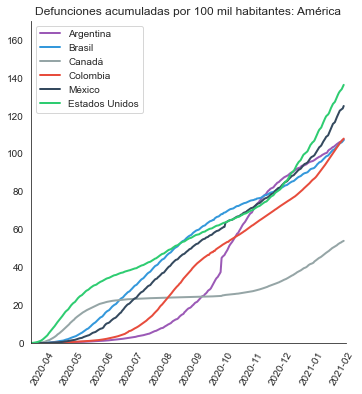

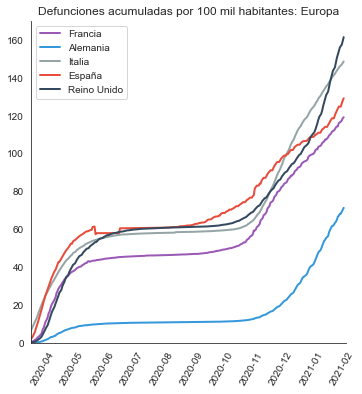

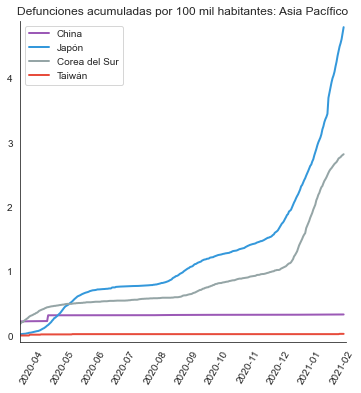

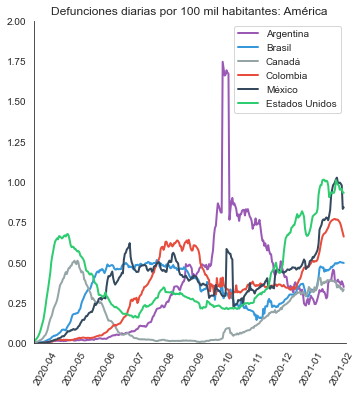

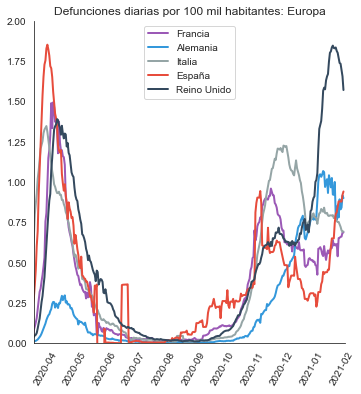

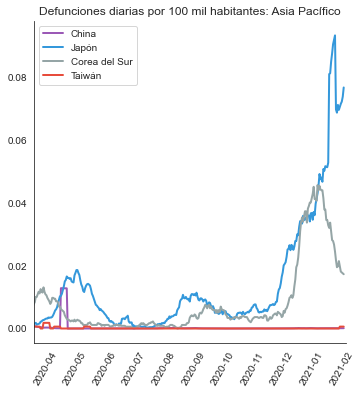

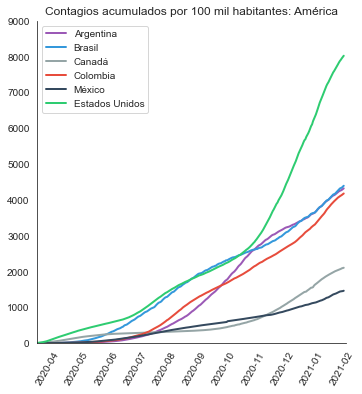

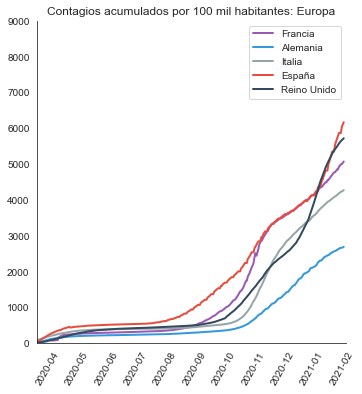

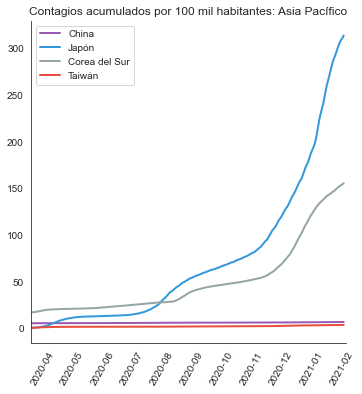

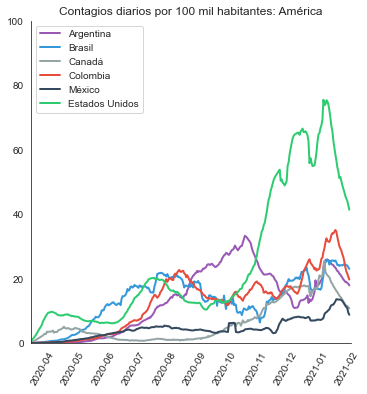

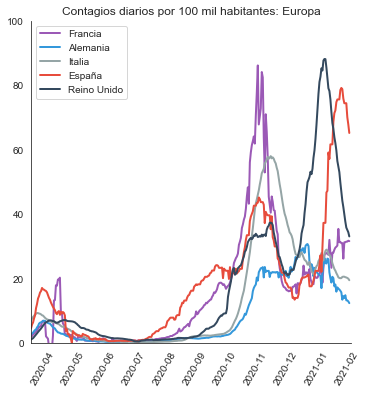

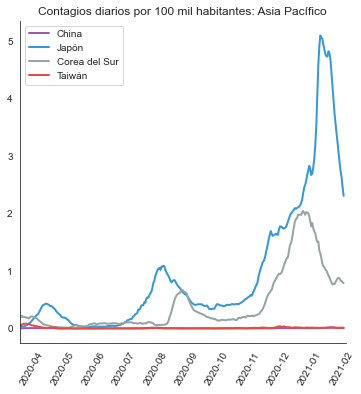

In [55]:
from urllib.request import urlretrieve
import requests 


url   = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
urlretrieve(url, path4 + 'owid-covid-data.csv') #path4 es el directorio donde quieres que se guarde
base_mundial_covid = pd.read_csv(path4+'owid-covid-data.csv',parse_dates=True)
#base_mundial_covid.head()

variables_relevantes = ['iso_code','location','date','total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million']

base_mundial_covid_2 = base_mundial_covid[variables_relevantes]
base_mundial_covid_2['date'] = pd.to_datetime(base_mundial_covid_2['date'])

# Vamos a crear una nueva columna con muertes por 

base_mundial_covid_2['total_deaths_per_100_thousand'] = base_mundial_covid_2['total_deaths_per_million']*0.1 

corte_min = datetime.datetime.strptime('2020-03-20','%Y-%m-%d')
hoy       = datetime.datetime.today()

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)

norte_america = ['MEX','USA','CAN','BRA','ARG','COL']
europa = ['GBR','FRA','ITA','ESP','DEU']
asia = ['KOR','JPN','CHN','TWN']

base_norte_america = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(norte_america)]
base_europa = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(europa)]
base_asia = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(asia)]

# América 
sns.set_style(style='white')
g = sns.relplot(x='date',y='total_deaths_per_100_thousand',kind='line',legend=False,hue='iso_code',data=base_norte_america)
plt.xlim(corte_min,hoy)
plt.ylim(0,170)
plt.legend(labels=['Argentina','Brasil', 'Canadá','Colombia','México','Estados Unidos'])
plt.xlabel('')
plt.xticks(rotation=60)
plt.margins(0.02)
plt.ylabel('')
plt.title('Defunciones acumuladas por 100 mil habitantes: América',fontsize=12)
plt.savefig(path2 + 'muertes_acumuladas_america.png',bbox_inches='tight')
plt.show()

# Europa 

h = sns.relplot(x='date',y='total_deaths_per_100_thousand',legend=False,kind='line',hue='iso_code',data=base_europa)
plt.xlim(corte_min,hoy)
plt.ylim(0,170)
plt.legend(labels=['Francia', 'Alemania','Italia','España','Reino Unido'])
plt.xlabel('')
plt.xticks(rotation=60)
plt.margins(0.02)
plt.ylabel('')
plt.title('Defunciones acumuladas por 100 mil habitantes: Europa',fontsize=12)
plt.savefig(path2 + 'muertes_acumuladas_europa.png',bbox_inches='tight')
plt.show()

# Asia 

k = sns.relplot(x='date',y='total_deaths_per_100_thousand',legend=False,kind='line',hue='iso_code',data=base_asia)
plt.xlim(corte_min,hoy)
plt.legend(labels=['China', 'Japón','Corea del Sur','Taiwán'])
plt.xlabel('')
plt.xticks(rotation=60)
plt.margins(0.02)
plt.ylabel('')
plt.title('Defunciones acumuladas por 100 mil habitantes: Asia Pacífico',fontsize=12)
plt.savefig(path2 + 'muertes_acumuladas_asia.png',bbox_inches='tight')
plt.show()

corte_min = datetime.datetime.strptime('2020-03-20','%Y-%m-%d')

base_mundial_covid_2['New_Deaths_per_100_thousand'] = base_mundial_covid_2['new_deaths_per_million']*0.1 

# Cálculo de Medias móviles 

## Norte América 

base_norte_america_por_dia = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(norte_america)]
base_norte_america_por_dia['Media_Movil'] = base_norte_america_por_dia['New_Deaths_per_100_thousand'].rolling(window=7).mean()

## Europa 

base_europa_por_dia = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(europa)]
base_europa_por_dia['Media_Movil'] = base_europa_por_dia['New_Deaths_per_100_thousand'].rolling(window=7).mean()


## Asia 

base_asia_por_dia = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(asia)]
base_asia_por_dia['Media_Movil'] = base_asia_por_dia['New_Deaths_per_100_thousand'].rolling(window=7).mean()


# Gráficas 

sns.set_style(style='white')
sns.relplot(x='date',y='Media_Movil',kind='line',hue='iso_code',legend=False,data=base_norte_america_por_dia)
plt.xlim(corte_min,hoy)
plt.legend(labels=['Argentina','Brasil', 'Canadá','Colombia','México','Estados Unidos'])
plt.ylim(0,2)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=60)
plt.title('Defunciones diarias por 100 mil habitantes: América',fontsize=12)
plt.savefig(path2 + 'Por_dia_muertes_america.png',bbox_inches='tight')
plt.show()

sns.set_style(style='white')
sns.relplot(x='date',y='Media_Movil',kind='line',hue='iso_code',legend=False,data=base_europa_por_dia)
plt.xlabel('')
plt.legend(labels=['Francia', 'Alemania','Italia','España','Reino Unido'])
plt.xlim(corte_min,hoy)
plt.ylim(0,2)
plt.ylabel('')
plt.xticks(rotation=60)
plt.title('Defunciones diarias por 100 mil habitantes: Europa',fontsize=12)
plt.savefig(path2 + 'Por_dia_muertes_europa.png',bbox_inches='tight')
plt.show()

sns.set_style(style='white')
sns.relplot(x='date',y='Media_Movil',kind='line',hue='iso_code',legend=False,data=base_asia_por_dia)
plt.xlabel('')
plt.legend(labels=['China', 'Japón','Corea del Sur','Taiwán'])
plt.xlim(corte_min,hoy)
plt.ylabel('')
plt.xticks(rotation=60)
plt.title('Defunciones diarias por 100 mil habitantes: Asia Pacífico',fontsize=12)
plt.savefig(path2 + 'Por_dia_muertes_asia.png',bbox_inches='tight')
plt.show()

# Casos acumulados 

base_mundial_covid_2['Cases_per_100_thousand'] = base_mundial_covid_2['total_cases_per_million']*0.1 

base_norte_america_casos = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(norte_america)]
base_norte_america_casos['Media_Movil'] = base_norte_america_casos['Cases_per_100_thousand'].rolling(window=7).mean()

base_europa_casos = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(europa)]
base_asia_casos   = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(asia)]

#norte_america_sin_chl = ['MEX','USA','CAN','BRA','COL']
#base_norte_america_casos_2 = base_mundial_casos_covid[base_mundial_casos_covid['Code'].isin(norte_america_sin_chl)]
#base_norte_america_casos_2['Media_Movil'] = base_norte_america_casos_2['Cases_per_100_thousand'].rolling(window=7).mean()

# Gráficas contagios acumulados 

## América

sns.set_style(style='white')
sns.relplot(x='date',y='Cases_per_100_thousand',kind='line',hue='iso_code',legend=False,data=base_norte_america_casos)
plt.xlabel('')
plt.xlim(corte_min,hoy)
plt.ylim(0,9000)
plt.ylabel('')
plt.legend(labels=['Argentina','Brasil', 'Canadá','Colombia','México','Estados Unidos'])
plt.xticks(rotation=60)
plt.title('Contagios acumulados por 100 mil habitantes: América',fontsize=12)
plt.savefig(path2+'casos_acumulados_america.png',bbox_inches='tight')
plt.show()

## América sin Chile 

#sns.set_palette("Paired")
#sns.set_style(style='white')
#sns.relplot(x='Date',y='Cases_per_100_thousand',kind='line',hue='Code',legend=False,data=base_norte_america_casos_2)
#plt.xlabel('Fecha')
#plt.xlim(corte_min,hoy)
#plt.ylim(0,800)
#plt.ylabel('Contagios acumulados')
#plt.legend(labels=['Brasil', 'Canadá','Colombia','México','Estados Unidos'])
#plt.xticks(rotation=60)
#plt.title('Contagios acumulados por 100 mil habitantes: América sin Chile',fontsize=12)
#plt.savefig('/users/efrainrodriguez/desktop/casos_acumulados_america_2.png',bbox_inches='tight')
#plt.show()


## Europa 

sns.set_style(style='white')
sns.relplot(x='date',y='Cases_per_100_thousand',kind='line',hue='iso_code',legend=False,data=base_europa_casos)
plt.xlabel('')
plt.xlim(corte_min,hoy)
plt.ylim(0,9000)
plt.ylabel('')
plt.legend(labels=['Francia', 'Alemania','Italia','España','Reino Unido'])
plt.xticks(rotation=60)
plt.title('Contagios acumulados por 100 mil habitantes: Europa',fontsize=12)
plt.savefig(path2 + 'casos_acumulados_europa.png',bbox_inches='tight')
plt.show()

## Asia 

sns.set_style(style='white')
sns.relplot(x='date',y='Cases_per_100_thousand',kind='line',hue='iso_code',legend=False,data=base_asia_casos)
plt.xlabel('')
plt.xlim(corte_min,hoy)
plt.ylabel('')
plt.legend(labels=['China', 'Japón','Corea del Sur','Taiwán'])
plt.xticks(rotation=60)
plt.title('Contagios acumulados por 100 mil habitantes: Asia Pacífico',fontsize=12)
plt.savefig(path2 + 'casos_acumulados_asia.png',bbox_inches='tight')
plt.show()

## Asia sin Singapur 

#asia_sin_singapur = ['KOR','JPN','CHN','TWN']
#base_asia_casos_2 = base_mundial_casos_covid[base_mundial_casos_covid['Code'].isin(asia_sin_singapur)]

#sns.set_palette("Paired")
#sns.set_style(style='white')
#sns.relplot(x='Date',y='Cases_per_100_thousand',kind='line',legend=False,hue='Code',data=base_asia_casos_2)
#plt.xlabel('Fecha')
#plt.xlim(corte_min,hoy)
#plt.legend(labels=['China', 'Japón','Corea del Sur','Taiwán'])
#plt.ylabel('Contagios acumulados')
#plt.xticks(rotation=60)
#plt.title('Contagios acumulados por 100 mil habitantes: Asia sin Singapur',fontsize=12)
#plt.savefig('/users/efrainrodriguez/desktop/casos_acumulados_asia_2.png',bbox_inches='tight')
#plt.show()

# Casos por día 

base_mundial_covid_2['Cases_per_100_thousand'] = base_mundial_covid_2['new_cases_per_million']*0.1 

base_norte_america_casos_dia = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(norte_america)]
base_norte_america_casos_dia['Media_Movil'] = base_norte_america_casos_dia['Cases_per_100_thousand'].rolling(window=7).mean()

base_europa_casos_dia = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(europa)]
base_europa_casos_dia['Media_Movil'] = base_europa_casos_dia['Cases_per_100_thousand'].rolling(window=7).mean()

base_asia_casos_dia = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(asia)]
base_asia_casos_dia['Media_Movil'] = base_asia_casos_dia['Cases_per_100_thousand'].rolling(window=7).mean()

#base_asia_2_casos_dia = base_mundial_covid_2[base_mundial_covid_2['iso_code'].isin(asia_sin_singapur)]
#base_asia_2_casos_dia['Media_Movil'] = base_asia_2_casos_dia['Cases_per_100_thousand'].rolling(window=7).mean()


#norte_america_sin_chl = ['MEX','USA','CAN','BRA','COL']
#base_norte_america_casos_2_dia = base_mundial_casos_covid_dia[base_mundial_casos_covid_dia['Code'].isin(norte_america_sin_chl)]
#base_norte_america_casos_2_dia['Media_Movil'] = base_norte_america_casos_dia['Cases_per_100_thousand'].rolling(window=7).mean()

## América 

sns.set_style(style='white')
sns.relplot(x='date',y='Media_Movil',kind='line',hue='iso_code',legend=False,data=base_norte_america_casos_dia)
plt.xlabel('')
plt.xlim(corte_min,hoy)
plt.ylim(0,100)
plt.ylabel('')
plt.legend(labels=['Argentina','Brasil', 'Canadá','Colombia','México','Estados Unidos'])
plt.xticks(rotation=60)
plt.title('Contagios diarios por 100 mil habitantes: América',fontsize=12)
plt.savefig(path2 + 'casos_diarios_america.png',bbox_inches='tight')
plt.show()

## América sin CHL

#sns.set_palette("Paired")
#sns.set_style(style='white')
#sns.relplot(x='Date',y='Media_Movil',kind='line',hue='Code',legend=False,data=base_norte_america_casos_2_dia)
#plt.xlabel('Fecha')
#plt.xlim(corte_min,hoy)
#plt.ylim(0,17.5)
#plt.ylabel('Contagios por día')
#plt.legend(labels=['Brasil', 'Canadá','Colombia','México','Estados Unidos'])
#plt.xticks(rotation=60)
#plt.title('Contagios diarios por 100 mil habitantes: América sin Chile',fontsize=12)
#plt.savefig('/users/efrainrodriguez/desktop/casos_diarios_america_2.png',bbox_inches='tight')
#plt.show()

## Europa 

sns.set_style(style='white')
sns.relplot(x='date',y='Media_Movil',kind='line',hue='iso_code',legend=False,data=base_europa_casos_dia)
plt.xlabel('')
plt.xlim(corte_min,hoy)
plt.ylim(0,100)
plt.ylabel('')
plt.legend(labels=['Francia', 'Alemania','Italia','España','Reino Unido'])
plt.xticks(rotation=60)
plt.title('Contagios diarios por 100 mil habitantes: Europa',fontsize=12)
plt.savefig(path2+'casos_diarios_europa.png',bbox_inches='tight')
plt.show()

## Asia 

sns.set_style(style='white')
sns.relplot(x='date',y='Media_Movil',kind='line',legend=False,hue='iso_code',data=base_asia_casos_dia)
plt.xlabel('')
plt.xlim(corte_min,hoy)
plt.ylabel('')
plt.legend(labels=['China', 'Japón','Corea del Sur','Taiwán'])
plt.xticks(rotation=60)
plt.title('Contagios diarios por 100 mil habitantes: Asia Pacífico',fontsize=12)
plt.savefig(path2+'casos_diarios_asia.png',bbox_inches='tight')
plt.show()

## Asia sin Singapur 

#sns.set_palette("Paired")
#sns.set_style(style='white')
#sns.relplot(x='date',y='Media_Movil',kind='line',hue='iso_code',legend=False,data=base_asia_2_casos_dia)
#plt.xlabel('Fecha')
#plt.xlim(corte_min,hoy)
#plt.ylim(0,2)
#plt.ylabel('Contagios por día')
#plt.legend(labels=['China', 'Japón','Corea del Sur','Taiwán'])
#plt.xticks(rotation=60)
#plt.title('Contagios diarios por 100 mil habitantes: Asia sin Singapur',fontsize=12)
#plt.savefig(path2+'casos_diarios_asia_2.png',bbox_inches='tight')
#plt.show()



In [56]:
from docx.shared import Cm
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.table import WD_TABLE_DIRECTION
from docx.enum.table import WD_ROW_HEIGHT_RULE

## Trayectoria para llamar las gráficas internacionales 

# REPORTE 

document = Document()

document.add_heading('Reporte al ' + datetime.datetime.today().strftime('%d/%m/%Y'),0)


document.add_heading('Consideraciones metodológicas', level=1)

document.add_heading('Información nacional',level=2)

document.add_paragraph(parrafo) 
document.add_paragraph(parrafo2)
document.add_paragraph(parrafo3)
document.add_paragraph(parrafo4,style='List Number')
document.add_paragraph(parrafo5,style='List Number')
document.add_paragraph(parrafo6,style='List Number')
document.add_paragraph(parrafo7)
document.add_paragraph(parrafo8)
document.add_paragraph(parrafo9)
document.add_paragraph(parrafo_letal)
document.add_paragraph(parrafo_letal2)
document.add_paragraph(parrafo_letal3)
document.add_paragraph(texto_cdmx)

document.add_heading('Información internacional', level = 2) 

document.add_paragraph(parrafo10)
document.add_paragraph(parrafo11)

#document.add_page_break()

document.add_heading('Nacional',level=1)

document.add_heading('Resumen', level=2)

### TABLA RESUMEN 

corte_string_2 = datetime.datetime.strftime(corte,'%Y-%m-%d')

#tabla0 = document.add_table(9,2,style='LightShading-Accent1')

#for row in tabla0.rows:
 #   row.height = Cm(0.33)         

# Valores en la tabla 

t = document.add_table(tabla_nacional.shape[0]+1, tabla_nacional.shape[1],style='LightShading-Accent1')

for j in range(tabla_nacional.shape[-1]):
    t.cell(0,j).text = tabla_nacional.columns[j] #
    
   
for i in range(tabla_nacional.shape[0]):
    for j in range(tabla_nacional.shape[-1]):
        t.cell(i+1,j).text = str(tabla_nacional.values[i,j])
        
document.save(path2+reporte)

# Alineacion 

document.add_paragraph('Nota: Las cifras presentadas como diarias son medias móviles de 7 días previos al ' + datetime.datetime.strftime(corte,'%d-%m-%Y'))  

### FIN TABLA RESUMEN 

document.add_heading('Defunciones', level=2)

paragraph = document.add_paragraph()
run = paragraph.add_run()
run.add_picture(path2+'graficaNACIONAL2.png', width=Inches(2.88))
run_2 = paragraph.add_run()
run_2.add_picture(path2+'graficaNACIONAL_acum' +'.png', width=Inches(2.88))

document.save(path2+reporte)

document.add_heading('Contagios', level=2)

paragraph = document.add_paragraph()
run = paragraph.add_run()
run.add_picture(path2 +'grafica'+ 'NACIONAL4' +'.png', width=Inches(2.88))
run_2 = paragraph.add_run()
run_2.add_picture(path2+'graficaNACIONAL2_acum' +'.png', width=Inches(2.88))

document.save(path2+reporte)

document.add_heading('Tasa de letalidad', level=2)

document.add_paragraph('Tasa de letalidad nacional y por género')

document.add_picture(path2 + 'grafica' + 'letalidadcov_gen' + '.png', width=Inches(4))

document.add_paragraph('Tasa de letalidad por rango de edad')

document.add_picture(path2 + 'grafica' + 'letalidadcov' + '.png', width=Inches(4))

document.save(path2 + reporte)  

document.add_heading('Cuadro de tendencias estatales', level=2)

parrafo12 = "Para clasificar la tendencia de una entidad federativa, se utilizan los siguientes criterios: "
parrafo13 = "Una entidad se clasifica “AL ALZA” si la media móvil de hace 10 días es mayor a la media móvil de hace 24 días por 5% o más, o si la media móvil del último dato es mayor por 5% o más a la media móvil de hace 14 días. Si se observa un incremento en los días más recientes a pesar del sub-reporto en la información más reciente, ello es evidencia de una tendencia reciente al alza."
parrafo14 = "Una entidad se clasifica “ESTABLE” si la media móvil de hace 10 días está en un intervalo de 5% alrededor de la media móvil de hace 24 días (y en el periodo más reciente, la última observación no está 5% arriba de la observación hace 14 días)."
parrafo15 = "Una entidad se clasifica “A LA BAJA” si la media móvil de hace 10 días es menor a la media móvil de hace 24 días por más de 5% y las observaciones en el sombreado rojo van a la baja (la última observación se ubica 5% o más por debajo de la observación hace 14 días)."

document.add_paragraph(parrafo12)
document.add_paragraph(parrafo13,style='List Bullet')
document.add_paragraph(parrafo14,style='List Bullet')
document.add_paragraph(parrafo15,style='List Bullet')

### Cuadro 
#document.add_page_break()

document.add_heading('Resumen de tendencias', level=3)

t = document.add_table(resumen_tend.shape[0]+1, resumen_tend.shape[1],style='LightShading-Accent1')

for j in range(resumen_tend.shape[-1]):
    t.cell(0,j).text = resumen_tend.columns[j] #
    
   
for i in range(resumen_tend.shape[0]):
    for j in range(resumen_tend.shape[-1]):
        t.cell(i+1,j).text = str(resumen_tend.values[i,j])
      
       
document.save(path2 + reporte)

document.add_paragraph('')

t = document.add_table(tend_ants.shape[0]+1, tend_ants.shape[1],style='LightShading-Accent1')

for j in range(tend_ants.shape[-1]):
    t.cell(0,j).text = tend_ants.columns[j] #
    
       
for i in range(tend_ants.shape[0]):
    for j in range(tend_ants.shape[-1]):
        t.cell(i+1,j).text = str(tend_ants.values[i,j])
        
document.save(path2 + reporte)
        
#Tendencias por estado

document.add_page_break()

document.add_heading('Tendencias por estados', level=3)

t = document.add_table(edos_tend.shape[0]+1, edos_tend.shape[1], style='LightShading-Accent1')

t.direction = WD_TABLE_DIRECTION.RTL
for j in range(edos_tend.shape[-1]):
    t.cell(0,j).text = edos_tend.columns[j]
        
for i in range(edos_tend.shape[0]):
    for j in range(edos_tend.shape[-1]):
        t.cell(i+1,j).text = str(edos_tend.values[i,j])

        
document.add_page_break()

document.add_picture(path2+'tendencia_contagios' +'.png', width=Inches(6))
document.add_picture(path2+'tendencia_defunciones' +'.png', width=Inches(6))

In [49]:
#AQUI HAGO LA MEDIA MOVIL PARA ESTADOS 

muertes_valle_mexico['FECHA_DEF'] = pd.to_datetime(muertes_valle_mexico['FECHA_DEF'])
datos_valle_mexico = pd.merge(muertes_valle_mexico[['FECHA_DEF','DEF_al_dia']],fechas,left_on='FECHA_DEF',right_on='Fecha',how='outer')
muerte_valle_mex = datos_valle_mexico.groupby('Fecha')['DEF_al_dia'].unique().apply(lambda x: np.nan_to_num(x)).apply(lambda x: int(x)).rolling(window=7).mean()[corte_string]
muerte_valle_mex_100 = (muerte_valle_mex / (poblacion['POBLACION'][9]+poblacion['POBLACION'][15]))*100000

contagios_valle_mexico['FECHA_SINTOMAS'] = pd.to_datetime(contagios_valle_mexico['FECHA_SINTOMAS'])
datos_valle_mexico_con = pd.merge(contagios_valle_mexico[['FECHA_SINTOMAS','CONT_al_dia']],fechas,left_on='FECHA_SINTOMAS',right_on='Fecha',how='outer')
cont_valle_mex = datos_valle_mexico_con.groupby('Fecha')['CONT_al_dia'].unique().apply(lambda x: np.nan_to_num(x)).apply(lambda x: int(x)).rolling(window=7).mean()[corte_string]
cont_valle_mex_100 = (cont_valle_mex / (poblacion['POBLACION'][9]+poblacion['POBLACION'][15]))*100000


In [57]:
### Internacional 
path4 = path2

document.add_heading('Internacional', level=1)

document.add_heading('Defunciones', level=2)

# Gráficas Muertes Diarias -------------------------------------------------------------------

paragraph = document.add_paragraph()
run = paragraph.add_run()
run.add_picture(path4 + 'Por_dia_muertes_america.png', width=Inches(2.88))
run_2 = paragraph.add_run()
run_2.add_picture(path4 + 'Por_dia_muertes_europa.png', width=Inches(2.88))
document.add_paragraph('NOTA: España implementó un cambio de metodología el 25 de mayo.')
document.save(path2 + reporte)
 
document.add_picture(path4 + 'Por_dia_muertes_asia.png', width=Inches(2.88))
document.save(path2 + reporte)

# Gráficas defunciones acumuladas -------------------------------------------------------------

paragraph = document.add_paragraph()
run = paragraph.add_run()
run.add_picture(path4 + 'muertes_acumuladas_america.png', width=Inches(2.88))
run_2 = paragraph.add_run()
run_2.add_picture(path4 + 'muertes_acumuladas_europa.png', width=Inches(2.88))
document.add_paragraph('NOTA: España implementó un cambio de metodología el 25 de mayo.')
document.save(path2 + reporte)

document.add_picture(path4 + 'muertes_acumuladas_asia.png', width=Inches(2.88))
document.save(path2 + reporte)

document.add_heading('Contagios', level=2) 

# Gráficas contagios Diarios ------------------------------------------------------------------

paragraph = document.add_paragraph()
run = paragraph.add_run()
run.add_picture(path4 + 'casos_diarios_america.png', width=Inches(2.88))
run_2 = paragraph.add_run()
run_2.add_picture(path4 + 'casos_diarios_europa.png', width=Inches(2.88))
document.save(path2 + reporte)

document.add_picture(path4+'casos_diarios_asia.png', width=Inches(2.88))
document.save(path2 + reporte)

# Gráficas contagios Acumulados ---------------------------------------------------------------

paragraph = document.add_paragraph()
run = paragraph.add_run()
run.add_picture(path4+'casos_acumulados_america.png', width=Inches(2.88))
run_2 = paragraph.add_run()
run_2.add_picture(path4 + 'casos_acumulados_europa.png', width=Inches(2.88))
document.save(path2 + reporte)

document.add_picture(path4+ 'casos_acumulados_asia.png', width=Inches(2.88))
document.save(path2 + reporte)

document.add_page_break()
document.save(path2 + reporte)



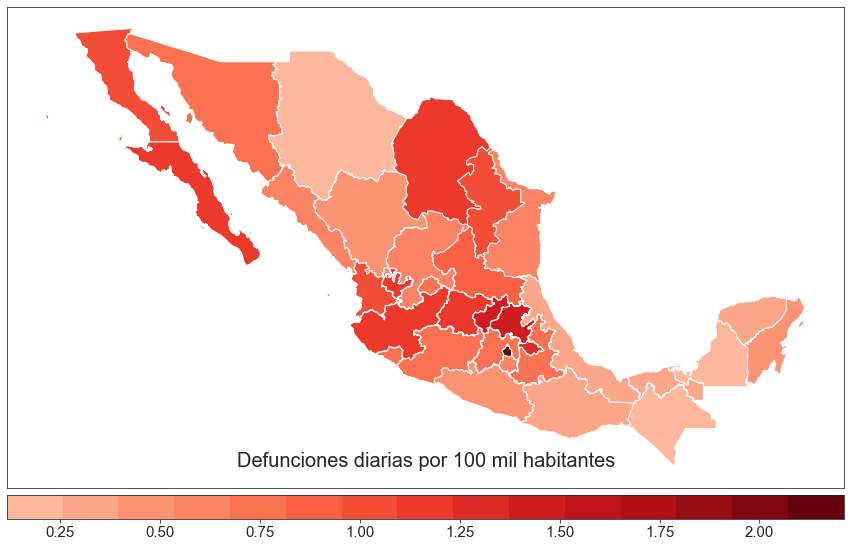

<Figure size 432x288 with 0 Axes>

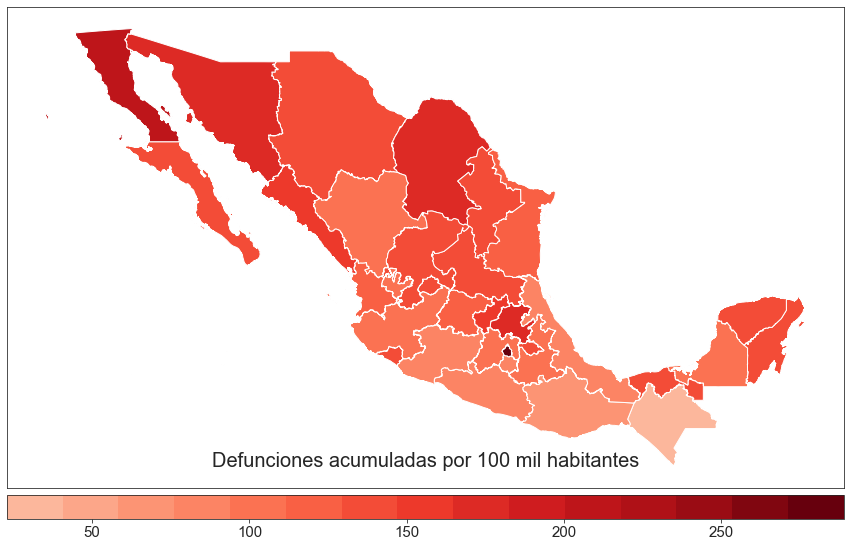

<Figure size 432x288 with 0 Axes>

In [58]:
corte_string = datetime.datetime.strftime(corte,'%d-%m-%Y')

document.add_heading('Entidades federativas', level=1)

document.add_heading('Defunciones',level=2)


from mpl_toolkits.axes_grid1 import make_axes_locatable 
# import mapclassify 

fig, ax = plt.subplots(figsize = (15,11))
divider = make_axes_locatable(ax)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

import matplotlib as mpl

cmap = mpl.cm.Reds(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[5:,:-1])

document.add_heading('Defunciones diarias por Covid-19 por 100 mil habitantes', level=3)

document.add_paragraph('En la siguiente gráfica se muestran las defunciones diarias por COVID19 por cada 100 mil habitantes. La cantidad de fallecimientos al día se clasifica por color, y el valor asignado se puede ver en la barra de color que incluye la gráfica.')

# Defunciones diarias 

cax = divider.append_axes('bottom', size = '5%', pad = 0.1)
cax.tick_params(labelsize=15)

data.plot(column = 'DEF_D_100', ax = ax, cax = cax, cmap = cmap, legend = True, legend_kwds={'orientation':'horizontal'})
plt.title('Defunciones diarias por 100 mil habitantes\n',fontsize=20)
plt.savefig(path2+'graficaDEF_D_100' +'.png', bbox_inches='tight')
plt.show()
plt.clf()
document.add_picture(path2+'graficaDEF_D_100' +'.png', width=Inches(6))
document.save(path2+reporte)

#document.add_page_break()

fig, ax = plt.subplots(figsize = (15,11))
divider = make_axes_locatable(ax)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

cmap = mpl.cm.Reds(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[5:,:-1])

document.add_heading('Defunciones acumuladas por COVID19 por cada 100 mil habitantes ', level=3)

document.add_paragraph('En la siguiente gráfica se muestran las defunciones acumuladas por COVID19 por cada 100 mil habitantes. La cantidad de fallecimientos se clasifica por color, y el valor asignado se puede ver en la barra de color que incluye la gráfica.')

# Defunciones acumuladas 

cax = divider.append_axes('bottom', size = '5%', pad = 0.1)
cax.tick_params(labelsize=15)

data.plot(column = 'DEF_A_100', ax = ax, cax = cax, cmap = cmap, legend = True, legend_kwds={'orientation':'horizontal'})
plt.title('Defunciones acumuladas por 100 mil habitantes\n',fontsize=20)
plt.savefig(path2+'graficaDEF_A_100' +'.png', bbox_inches='tight')
document.add_picture(path2+'graficaDEF_A_100' +'.png', width=Inches(6))
document.save(path2+reporte)
plt.show()
plt.clf()

In [59]:
document.add_page_break()

document.add_heading('Cuadro de defunciones por entidad federativa', level=3)

table = document.add_table(34,5,style='LightShading-Accent1')
table.direction = WD_TABLE_DIRECTION.RTL

for row in table.rows:
    row.height = Cm(0.33)   

hdr_cells = table.rows[0].cells
hdr_cells[0].add_paragraph('ENTIDAD FEDERATIVA').alignment = WD_ALIGN_PARAGRAPH.RIGHT
hdr_cells[1].add_paragraph('DEFUNCIONES DIARIAS AL ' + corte_string).alignment = WD_ALIGN_PARAGRAPH.RIGHT
hdr_cells[2].add_paragraph('DEFUNCIONES ACUMULADAS ').alignment = WD_ALIGN_PARAGRAPH.RIGHT
hdr_cells[3].add_paragraph('DEFUNCIONES DIARIAS POR 100 MIL HABITANTES').alignment = WD_ALIGN_PARAGRAPH.RIGHT
hdr_cells[4].add_paragraph('DEFUNCIONES ACUMULADAS POR 100 MIL HABITANTES').alignment = WD_ALIGN_PARAGRAPH.RIGHT

for i in x: 
    table.cell(i, 0).text = estados2['ENTIDAD_FEDERATIVA'][i]
    document.save(path2 + reporte)    

table.cell(33,0).text = 'VALLE DE MÉXICO'
document.save(path2 + reporte)
    
for i in x: 
    table.cell(i,1).text = '{:6.2f}'.format(datos_tabla2[i])
    document.save(path2 + reporte) 

table.cell(33,1).text = '{:6.2f}'.format(muerte_valle_mex)
document.save(path2 + reporte)
   
for i in x: 
    table.cell(i,2).text = '{:,}'.format(dfs[i]['DEF'].count())
    document.save(path2 + reporte) 

table.cell(33,2).text = '{:,}'.format(muertes_valle_mexico['DEF'].count())
document.save(path2 + reporte) 
     
for i in x: 
    table.cell(i,3).text = '{:6.2f}'.format(datos_tabla3[i])
    document.save(path2 + reporte) 
    
table.cell(33,3).text = '{:6.2f}'.format(muerte_valle_mex_100)
document.save(path2 + reporte)    
    
for i in x:     
    table.cell(i,4).text = str(int(dfs[i]['DEF'].count()/poblacion['POBLACION'][i]*100000))
    document.save(path2 + reporte)
    
table.cell(33,4).text = str(int(round((muertes_valle_mexico['DEF'].count()/(poblacion['POBLACION'][9]+poblacion['POBLACION'][15]))*100000)))

print('Ya')

Ya


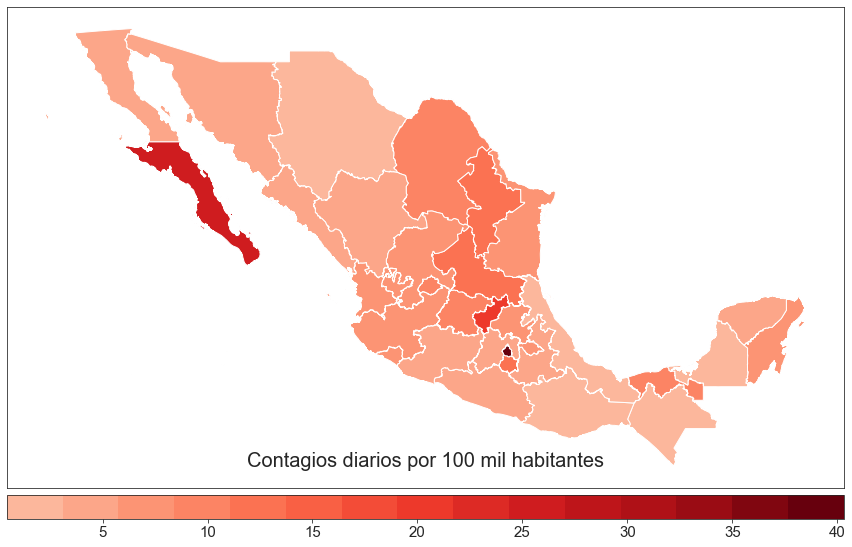

<Figure size 432x288 with 0 Axes>

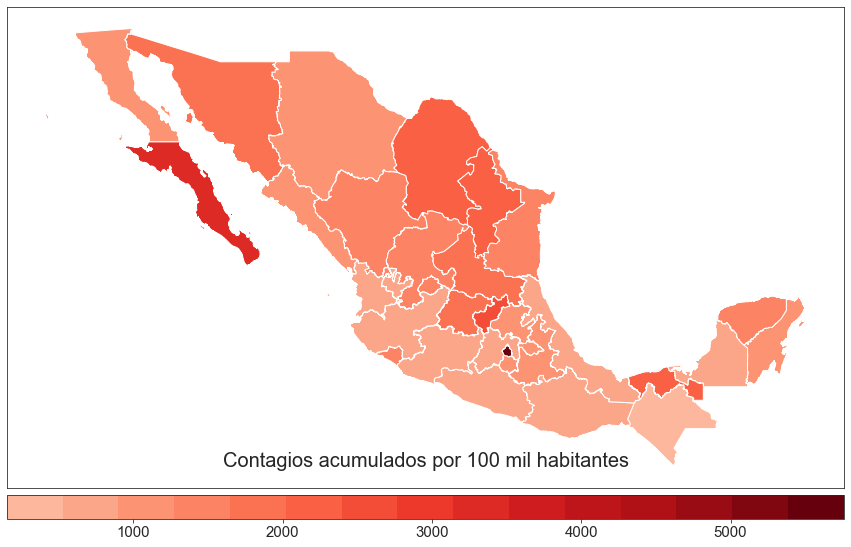

<Figure size 432x288 with 0 Axes>

In [60]:
# Gráficas Defunciones estados y Valle de México 

document.add_heading('Defunciones por entidad federativa', level=3)

for i in range(1,32,2):
    paragraph = document.add_paragraph()
    run = paragraph.add_run()
    run.add_picture(path2+'grafica'+ estados2['ENTIDAD_FEDERATIVA'][i] +'2.png', width=Inches(3))
    run_2 = paragraph.add_run()
    run_2.add_picture(path2+'grafica'+ estados2['ENTIDAD_FEDERATIVA'][i+1] +'2.png', width=Inches(3))
    document.save(path2 + reporte)
      
document.add_picture(path2+'graficaVALLEMEXICO2' +'.png', width=Inches(3))
document.save(path2+reporte)

document.add_page_break()

document.add_heading('Contagios',level=2)

from mpl_toolkits.axes_grid1 import make_axes_locatable 
# import mapclassify 

fig, ax = plt.subplots(figsize = (15,11))
divider = make_axes_locatable(ax)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

import matplotlib as mpl

cmap = mpl.cm.Reds(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[5:,:-1])

# ax.set_axis_off()

document.add_heading('Contagios diarios por Covid-19 por 100 mil habitantes', level=3)                    

document.add_paragraph('En la siguiente gráfica se muestran los contagios diarios por COVID19 por cada 100 mil habitantes. La cantidad de contagios al día se clasifica por color, y el valor asignado se puede ver en la barra de color que incluye la gráfica.')

### Aquí van los mapas de Karla 

# Contagios diarios 

cax = divider.append_axes('bottom', size = '5%', pad = 0.1)
cax.tick_params(labelsize=15)


data.plot(column = 'CON_D_100', ax = ax, cax = cax, cmap = cmap, legend = True, legend_kwds={'orientation':'horizontal'})
plt.title('Contagios diarios por 100 mil habitantes\n',fontsize=20)
plt.savefig(path2+'graficaCON_D_100' +'.png', bbox_inches='tight')
document.add_picture(path2+'graficaCON_D_100' +'.png', width=Inches(6))
document.save(path2+reporte)
plt.show()
plt.clf()

#document.add_page_break()

fig, ax = plt.subplots(figsize = (15,11))
divider = make_axes_locatable(ax)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

cmap = mpl.cm.Reds(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[5:,:-1])

document.add_heading('Contagios acumulados por COVID19 por cada 100 mil habitantes ', level=3)

document.add_paragraph('En la siguiente gráfica se muestran los contagios acumulados por COVID19 por cada 100 mil habitantes. La cantidad de contagios se clasifica por color, y el valor asignado se puede ver en la barra de color que incluye la gráfica.')

# Defunciones acumuladas 

cax = divider.append_axes('bottom', size = '5%', pad = 0.1)
cax.tick_params(labelsize=15)

data.plot(column = 'CON_A_100', ax = ax, cax = cax, cmap = cmap, legend = True, legend_kwds={'orientation':'horizontal'})
plt.title('Contagios acumulados por 100 mil habitantes\n',fontsize=20)
plt.savefig(path2+'graficaCON_A_100' +'.png', bbox_inches='tight')
document.add_picture(path2+'graficaCON_A_100' +'.png', width=Inches(6))
document.save(path2+reporte)
plt.show()
plt.clf()


In [61]:
document.add_page_break()
document.add_heading('Cuadro de contagios por entidad federativa', level=3)                    
                       
table2 = document.add_table(34,5,style='LightShading-Accent1')

for row in table2.rows:
    row.height = Cm(0.33)
    
hdr_cells = table2.rows[0].cells
hdr_cells[0].add_paragraph('ENTIDAD FEDERATIVA').alignment = WD_ALIGN_PARAGRAPH.RIGHT
hdr_cells[1].add_paragraph('CONTAGIOS DIARIOS AL ' + corte_string).alignment=WD_ALIGN_PARAGRAPH.RIGHT
hdr_cells[2].add_paragraph('CONTAGIOS ACUMULADOS').alignment = WD_ALIGN_PARAGRAPH.RIGHT
hdr_cells[3].add_paragraph('CONTAGIOS DIARIOS POR 100 MIL HABITANTES').alignment = WD_ALIGN_PARAGRAPH.RIGHT
hdr_cells[4].add_paragraph('CONTAGIOS ACUMULADOS POR 100 MIL HABITANTES').alignment = WD_ALIGN_PARAGRAPH.RIGHT
             
for i in x: 
    table2.cell(i, 0).text = estados2['ENTIDAD_FEDERATIVA'][i]
    document.save(path2 + reporte)    
    
table2.cell(33,0).text = 'VALLE DE MÉXICO'
document.save(path2 + reporte)   
    
for i in x: 
    table2.cell(i,1).text = '{:6.2f}'.format(datos_tabla2_con[i])
    document.save(path2 + reporte) 
    

table2.cell(33,1).text = '{:,.2f}'.format(float(media_contagios_valle.loc[corte_string_2].values))
document.save(path2 + reporte) 

for i in x: 
    table2.cell(i,2).text = '{:,}'.format(cns[i]['CONT'].count())
    document.save(path2 + reporte) 
  
table2.cell(33,2).text = '{:,}'.format(contagios_valle_mexico['CONT'].count())
document.save(path2 + reporte) 

for i in x: 
    table2.cell(i,3).text = '{:6.2f}'.format(datos_tabla3_con[i])
    document.save(path2 + reporte) 
    
table2.cell(33,3).text = '{:6.2f}'.format(float(media_contagios_valle_100_mil.loc[corte_string_2].values))
document.save(path2 + reporte)    
        
for i in x:     
    table2.cell(i,4).text = str(int(cns[i]['CONT'].count()/poblacion['POBLACION'][i]*100000))
    document.save(path2 + reporte)                   

table2.cell(33,4).text = str(int(round((contagios_valle_mexico['CONT'].count()/(poblacion['POBLACION'][9]+poblacion['POBLACION'][15]))*100000)))
document.save(path2 + reporte)        

document.add_page_break()
                               
##### TERMINA TABLA #####              
                                    
document.add_heading('Contagios por entidad federativa', level=3)
                                   
for i in range(1,32,2):
    paragraph = document.add_paragraph()
    run = paragraph.add_run()
    run.add_picture(path2+'grafica'+ estados2['ENTIDAD_FEDERATIVA'][i] +'4.png', width=Inches(3))
    run_2 = paragraph.add_run()
    run_2.add_picture(path2+'grafica'+ estados2['ENTIDAD_FEDERATIVA'][i+1] +'4.png', width=Inches(3))
    document.save(path2 + reporte)

document.add_picture(path2 +'graficaVALLEMEXICO4' +'.png', width=Inches(3))


document.add_page_break()
document.save(path2 + reporte)    


In [62]:
document.add_heading('CDMX', level=1)

document.add_heading('Tendencias por alcaldías', level=2)

t = document.add_table(delegaciones_tend.shape[0]+1, delegaciones_tend.shape[1], style='LightShading-Accent1')

t.direction = WD_TABLE_DIRECTION.RTL
for j in range(delegaciones_tend.shape[-1]):
    t.cell(0,j).text = delegaciones_tend.columns[j]
        
for i in range(delegaciones_tend.shape[0]):
    for j in range(delegaciones_tend.shape[-1]):
        t.cell(i+1,j).text = str(delegaciones_tend.values[i,j])
        
document.save(path2 + reporte)

document.add_heading('Mapas', level=3)

document.add_paragraph('Las claves de las alcaldías se tomaron de la base de datos de la SSA.')

t = document.add_table(muns_cdmx.shape[0]+1, muns_cdmx.shape[1], style='LightShading-Accent1')

t.direction = WD_TABLE_DIRECTION.RTL
for j in range(muns_cdmx.shape[-1]):
    t.cell(0,j).text = muns_cdmx.columns[j]
        
for i in range(muns_cdmx.shape[0]):
    for j in range(muns_cdmx.shape[-1]):
        t.cell(i+1,j).text = str(muns_cdmx.values[i,j])
        
paragraph = document.add_paragraph()
run = paragraph.add_run()
run.add_picture(path2 + 'cdmx-def-diarias.png', width=Inches(3))
run_2 = paragraph.add_run()
run_2.add_picture(path2 + 'cdmx-def-acum.png', width=Inches(3))

document.save(path2 + reporte)

paragraph = document.add_paragraph()
run = paragraph.add_run()
run.add_picture(path2 + 'cdmx-casos-dia.png', width=Inches(3))
run_2 = paragraph.add_run()
run_2.add_picture(path2 + 'cdmx-casos-acum.png', width=Inches(3))


document.add_heading('Defunciones', level=2)

paragraph = document.add_paragraph()
run = paragraph.add_run()
run.add_picture(path2+municipios[15]+'def.png', width=Inches(3))

for i in range(0,15,2):
    paragraph = document.add_paragraph()
    run = paragraph.add_run()
    run.add_picture(path2+municipios[i]+'def.png', width=Inches(3))
    run_2 = paragraph.add_run()
    run_2.add_picture(path2+municipios[i+1]+'def.png', width=Inches(3))
    document.save(path2 + reporte)
    i += 1 
    
document.add_heading('Contagios', level=2)
   
paragraph = document.add_paragraph()
run = paragraph.add_run()
run.add_picture(path2+municipios[15]+'.png', width=Inches(3))
  
for i in range(0,15,2):
    paragraph = document.add_paragraph()
    run = paragraph.add_run()
    run.add_picture(path2+municipios[i]+'.png', width=Inches(3))
    run_2 = paragraph.add_run()
    run_2.add_picture(path2+municipios[i+1]+'.png', width=Inches(3))
    i += 1 
    document.save(path2 + reporte)

In [63]:
print('FIN')

FIN
